# Day 1

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pvlib
from pvlib import atmosphere, tools

naive_times = pd.date_range(start = '2019-09-01 06:24', end = '2019-09-01 17:54', freq = '1min')
coordinates = [(-25.750233, 28.278718, 'South Africa-Pretoria', 1381, 'Etc/GMT-2')]


sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
# inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = {'module': module,'surface_azimuth': 180}

for latitude, longitude, name, altitude, timezone in coordinates:

	times = naive_times.tz_localize(timezone)
	system['surface_tilt'] = latitude

	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

exl_1 = pd.read_csv('csir_1.csv')
x = exl_1.iloc[384: 1075,1]
y = exl_1.iloc[384: 1075,2]
c = exl_1.iloc[384: 1075,1]
c1 = exl_1.iloc[384: 1075,0]

apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1185.0 * cos_zenith[cos_zen_gte_0] * np.exp(-0.059/cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])


import ephem
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
sunset.head()

,sunrise,sunset,transit
2019-09-01 06:24:00+02:00,2019-09-02 06:18:22.229078+02:00,2019-09-01 17:54:56.149384+02:00,2019-09-01 12:06:59.735797+02:00
2019-09-01 06:25:00+02:00,2019-09-02 06:18:22.229078+02:00,2019-09-01 17:54:56.149384+02:00,2019-09-01 12:06:59.735797+02:00
2019-09-01 06:26:00+02:00,2019-09-02 06:18:22.229078+02:00,2019-09-01 17:54:56.149384+02:00,2019-09-01 12:06:59.735797+02:00
2019-09-01 06:27:00+02:00,2019-09-02 06:18:22.229078+02:00,2019-09-01 17:54:56.149384+02:00,2019-09-01 12:06:59.735797+02:00
2019-09-01 06:28:00+02:00,2019-09-02 06:18:22.229078+02:00,2019-09-01 17:54:56.149384+02:00,2019-09-01 12:06:59.735797+02:00


# 1. Haurwitz model

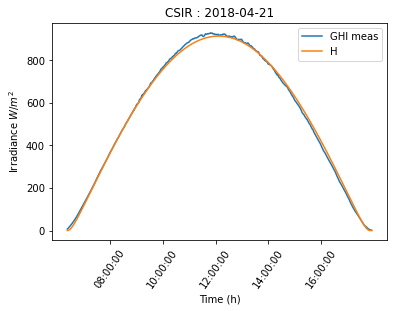

In [2]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'H')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2018-04-21')
plt.legend()

In [3]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
11.710577009655427
Below is the mean absolute error
9.724135520717683
Below is the mean square error
137.13761389907023
Below is the RMSE percent
2.080538590994728
Below is the MAE percent
1.7276210385051765


In [4]:
a = 37
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(421    07:01:00
 422    07:02:00
 423    07:03:00
 424    07:04:00
 425    07:05:00
 426    07:06:00
 427    07:07:00
 428    07:08:00
 429    07:09:00
 430    07:10:00
 431    07:11:00
 432    07:12:00
 433    07:13:00
 434    07:14:00
 435    07:15:00
 436    07:16:00
 437    07:17:00
 438    07:18:00
 439    07:19:00
 440    07:20:00
 441    07:21:00
 442    07:22:00
 443    07:23:00
 444    07:24:00
 445    07:25:00
 446    07:26:00
 447    07:27:00
 448    07:28:00
 449    07:29:00
 450    07:30:00
 451    07:31:00
 452    07:32:00
 453    07:33:00
 454    07:34:00
 455    07:35:00
 456    07:36:00
 457    07:37:00
 458    07:38:00
 459    07:39:00
 460    07:40:00
 461    07:41:00
 462    07:42:00
 463    07:43:00
 464    07:44:00
 465    07:45:00
 466    07:46:00
 467    07:47:00
 468    07:48:00
 469    07:49:00
 470    07:50:00
 471    07:51:00
 472    07:52:00
 473    07:53:00
 474    07:54:00
 475    07:55:00
 476    07:56:00
 477    07:57:00
 478    07:58:00
 479    07:59:

In [5]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
3.5184763345113077 1.3571066396202538 5.628946431526388 12.561842623257427 16.96128558877483 6.360403809535618 4.832728694723056 9.936269729735425 17.871000778747515 18.769030676167837
rmse hourly beginning from 7
4.014018736477352 1.6353618340842042 6.1729666236415355 12.915104139603804 17.322034848351386 7.009445584627093 5.459795524672879 10.899578416003353 17.957005592224533 18.947295030921246
Below is the RMSE percent
0.713143415506454 0.29054361738510254 1.0967090068080718 2.2945387359655056 3.0774881499721243 1.2453205361503679 0.9700047468759586 1.9364539852622868 3.190299084539351 3.3662370756190616
Below is the MAE percent
0.6251037663999653 0.24110790898664627 1.0000566383515295 2.2317771643652367 3.0133962819452145 1.1300096971428486 0.8585980469526623 1.7653094810104142 3.1750191941203987 3.334566059822193


Text(1, 700, 'Elev. : 1381m')

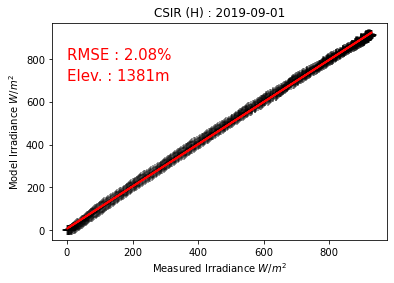

In [6]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (H) : 2019-09-01')
plt.text(1, 800, 'RMSE : 2.08%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

In [7]:
#sns.regplot(x=y, y=df_out, color='black', marker='+')

# 2. ABCG MODEL

In [8]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1150 * (cos_zenith[cos_zen_gte_0] **1.15))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (939.39 * (cos_zenith[cos_zen_gte_0] **1.15))
# ABCG_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

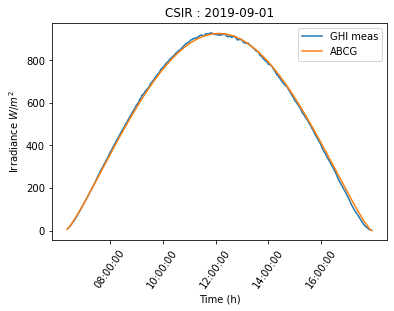

In [9]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'ABCG')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-01')
plt.legend()

In [10]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
9.873795136927372
Below is the mean absolute error
8.452121884416632
Below is the mean square error
97.49183040601062
Below is the RMSE percent
1.7542100449034939
Below is the MAE percent
1.5016310248266158


In [11]:
a = 37
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(421    07:01:00
 422    07:02:00
 423    07:03:00
 424    07:04:00
 425    07:05:00
 426    07:06:00
 427    07:07:00
 428    07:08:00
 429    07:09:00
 430    07:10:00
 431    07:11:00
 432    07:12:00
 433    07:13:00
 434    07:14:00
 435    07:15:00
 436    07:16:00
 437    07:17:00
 438    07:18:00
 439    07:19:00
 440    07:20:00
 441    07:21:00
 442    07:22:00
 443    07:23:00
 444    07:24:00
 445    07:25:00
 446    07:26:00
 447    07:27:00
 448    07:28:00
 449    07:29:00
 450    07:30:00
 451    07:31:00
 452    07:32:00
 453    07:33:00
 454    07:34:00
 455    07:35:00
 456    07:36:00
 457    07:37:00
 458    07:38:00
 459    07:39:00
 460    07:40:00
 461    07:41:00
 462    07:42:00
 463    07:43:00
 464    07:44:00
 465    07:45:00
 466    07:46:00
 467    07:47:00
 468    07:48:00
 469    07:49:00
 470    07:50:00
 471    07:51:00
 472    07:52:00
 473    07:53:00
 474    07:54:00
 475    07:55:00
 476    07:56:00
 477    07:57:00
 478    07:58:00
 479    07:59:

In [12]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
4.004476304719383 9.282061851897412 9.442123681540819 8.13342096656334 6.817967316261692 5.021371381073272 4.865009368720509 8.000935244285664 9.999952640200107 15.345167847314945
rmse hourly beginning from 7
5.020861598183894 9.332095209165743 9.75325555884528 8.292365253165274 7.741086002497512 5.798138961328807 5.811275837442823 8.569137699233615 10.136333140090548 15.578739816777846
Below is the RMSE percent
0.8920223406969786 1.657969902037956 1.7327945976770047 1.4732481504207076 1.375306114389241 1.030115924693417 1.0324498641481332 1.5224204289936942 1.800853386792909 2.767768775283101
Below is the MAE percent
0.711448076539978 1.6490808156549397 1.6775179125839603 1.4450095997651087 1.211301894170336 0.892112910356655 0.8643331348086788 1.4214717623274444 1.7766235906994061 2.7262716316460684


Text(1, 700, 'Elev. : 1381m')

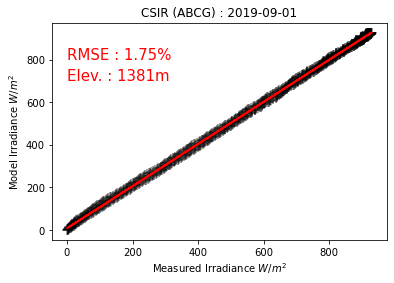

In [13]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (ABCG) : 2019-09-01')
plt.text(1, 800, 'RMSE : 1.75%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 3. Berger Duffie Model

In [22]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1285.0 * (0.86*cos_zenith[cos_zen_gte_0])) - 5

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (1390* (0.70*cos_zenith[cos_zen_gte_0]))
# BD_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

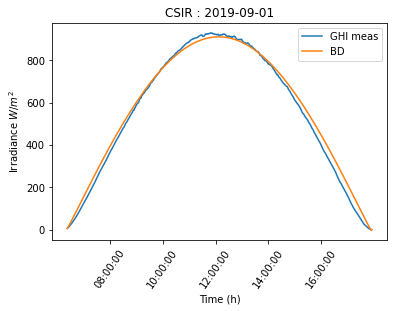

In [23]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'BD')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-01')
plt.legend()

In [24]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
27.90320793504729
Below is the mean absolute error
23.011617142525232
Below is the mean square error
778.5890130664861
Below is the RMSE percent
4.957373225379983
Below is the MAE percent
4.088317549745424


In [25]:
a = 37
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(421    07:01:00
 422    07:02:00
 423    07:03:00
 424    07:04:00
 425    07:05:00
 426    07:06:00
 427    07:07:00
 428    07:08:00
 429    07:09:00
 430    07:10:00
 431    07:11:00
 432    07:12:00
 433    07:13:00
 434    07:14:00
 435    07:15:00
 436    07:16:00
 437    07:17:00
 438    07:18:00
 439    07:19:00
 440    07:20:00
 441    07:21:00
 442    07:22:00
 443    07:23:00
 444    07:24:00
 445    07:25:00
 446    07:26:00
 447    07:27:00
 448    07:28:00
 449    07:29:00
 450    07:30:00
 451    07:31:00
 452    07:32:00
 453    07:33:00
 454    07:34:00
 455    07:35:00
 456    07:36:00
 457    07:37:00
 458    07:38:00
 459    07:39:00
 460    07:40:00
 461    07:41:00
 462    07:42:00
 463    07:43:00
 464    07:44:00
 465    07:45:00
 466    07:46:00
 467    07:47:00
 468    07:48:00
 469    07:49:00
 470    07:50:00
 471    07:51:00
 472    07:52:00
 473    07:53:00
 474    07:54:00
 475    07:55:00
 476    07:56:00
 477    07:57:00
 478    07:58:00
 479    07:59:

In [26]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
33.132127320028275 22.897648197814508 6.8000662803516505 10.049740150925647 19.581299946775818 9.523572749371073 6.109385706904737 19.15735299525425 38.814217205163956 52.811682120875844
rmse hourly beginning from 7
33.195500200231415 23.258562469434924 7.860439352544745 11.197881373198166 19.815511209546962 9.98805486634297 6.881710622479887 20.40084725069053 39.12525165900366 52.86997042573393
Below is the RMSE percent
5.897618807084455 4.132190646867608 1.396510812546559 1.989451443349958 3.5204871406216163 1.7745097941173686 1.2226267339621928 3.624479815047067 6.951117429296747 9.393048155081985
Below is the MAE percent
5.886359778363973 4.068069462272868 1.208121538838663 1.7854689991988033 3.478876418089396 1.6919884146507393 1.085413017651204 3.40355664584863 6.8958580527682525 9.382692468290383


Text(1, 700, 'Elev. : 1381m')

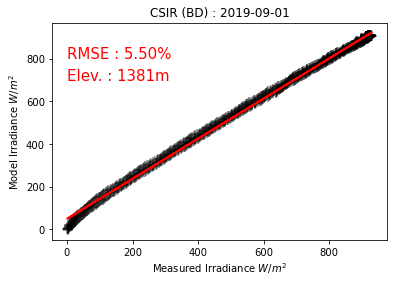

In [27]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'BD', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (BD) : 2019-09-01')
plt.text(1, 800, 'RMSE : 5.50%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 4. Kasten Czeplak Model

In [137]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = ((1145.0 * cos_zenith[cos_zen_gte_0]) - 30)

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

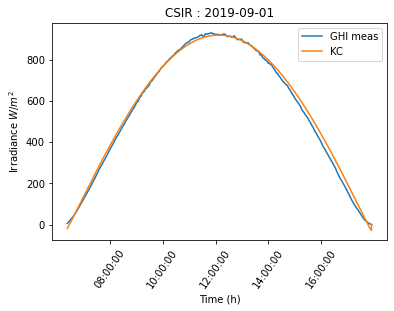

In [138]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'KC')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-01')
plt.legend()

In [30]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
20.391889145040356
Below is the mean absolute error
16.249895099983362
Below is the mean square error
415.8291429036147
Below is the RMSE percent
3.622888289327026
Below is the MAE percent
2.8870083709159866


In [31]:
a = 37
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(421    07:01:00
 422    07:02:00
 423    07:03:00
 424    07:04:00
 425    07:05:00
 426    07:06:00
 427    07:07:00
 428    07:08:00
 429    07:09:00
 430    07:10:00
 431    07:11:00
 432    07:12:00
 433    07:13:00
 434    07:14:00
 435    07:15:00
 436    07:16:00
 437    07:17:00
 438    07:18:00
 439    07:19:00
 440    07:20:00
 441    07:21:00
 442    07:22:00
 443    07:23:00
 444    07:24:00
 445    07:25:00
 446    07:26:00
 447    07:27:00
 448    07:28:00
 449    07:29:00
 450    07:30:00
 451    07:31:00
 452    07:32:00
 453    07:33:00
 454    07:34:00
 455    07:35:00
 456    07:36:00
 457    07:37:00
 458    07:38:00
 459    07:39:00
 460    07:40:00
 461    07:41:00
 462    07:42:00
 463    07:43:00
 464    07:44:00
 465    07:45:00
 466    07:46:00
 467    07:47:00
 468    07:48:00
 469    07:49:00
 470    07:50:00
 471    07:51:00
 472    07:52:00
 473    07:53:00
 474    07:54:00
 475    07:55:00
 476    07:56:00
 477    07:57:00
 478    07:58:00
 479    07:59:

In [32]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
18.274221847282952 16.102221697262827 6.242300462194072 5.308001525169894 12.091129843936024 2.802376522669561 5.878827235080451 20.44657571725627 33.77102764670324 39.91698270674376
rmse hourly beginning from 7
18.35300593996259 16.233839986335898 6.998274355662963 6.524616152435137 12.524535936663337 3.4518524680960256 7.709066303201486 21.203559007896523 33.90296025829578 39.9633889258188
Below is the RMSE percent
3.260653773709411 2.884155968041319 1.2433358198593136 1.159184187540582 2.225149139025653 0.6132671570643208 1.3696173921339243 3.7670921548946494 6.023308425211442 7.1000235785601
Below is the MAE percent
3.246656739657089 2.860772241562987 1.1090270784668308 0.9430365391107045 2.1481488254844883 0.4978791819655341 1.0444512616492845 3.632604080770148 5.9998688551883195 7.091778901157085


Text(1, 700, 'Elev. : 1381m')

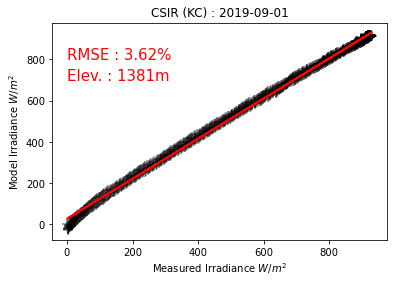

In [33]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (KC) : 2019-09-01')
plt.text(1, 800, 'RMSE : 3.62%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 5. Ineichen - Perez Model

In [34]:
tl = 2.3

linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

relative_airmass = pvlib.atmosphere.get_relative_airmass(apparent_zenith, model='kastenyoung1989')

cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl, dni_extra=dni_extra, altitude=altitude)


df_out = cs['ghi']


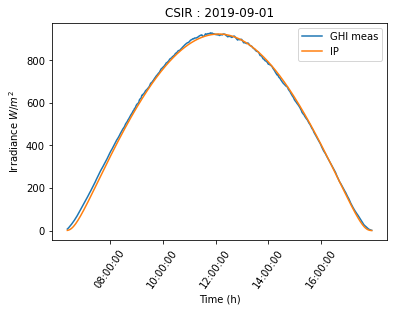

In [35]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'IP')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-01')
plt.legend()

In [36]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
12.127106578957818
Below is the mean absolute error
9.805857733516579
Below is the mean square error
147.066713977402
Below is the RMSE percent
2.154540567371256
Below is the MAE percent
1.7421400683812789


In [37]:
a = 37
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(421    07:01:00
 422    07:02:00
 423    07:03:00
 424    07:04:00
 425    07:05:00
 426    07:06:00
 427    07:07:00
 428    07:08:00
 429    07:09:00
 430    07:10:00
 431    07:11:00
 432    07:12:00
 433    07:13:00
 434    07:14:00
 435    07:15:00
 436    07:16:00
 437    07:17:00
 438    07:18:00
 439    07:19:00
 440    07:20:00
 441    07:21:00
 442    07:22:00
 443    07:23:00
 444    07:24:00
 445    07:25:00
 446    07:26:00
 447    07:27:00
 448    07:28:00
 449    07:29:00
 450    07:30:00
 451    07:31:00
 452    07:32:00
 453    07:33:00
 454    07:34:00
 455    07:35:00
 456    07:36:00
 457    07:37:00
 458    07:38:00
 459    07:39:00
 460    07:40:00
 461    07:41:00
 462    07:42:00
 463    07:43:00
 464    07:44:00
 465    07:45:00
 466    07:46:00
 467    07:47:00
 468    07:48:00
 469    07:49:00
 470    07:50:00
 471    07:51:00
 472    07:52:00
 473    07:53:00
 474    07:54:00
 475    07:55:00
 476    07:56:00
 477    07:57:00
 478    07:58:00
 479    07:59:

In [38]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
24.575671324798474 14.757296024610453 9.319975866378886 8.405632735555088 8.471976894042852 3.396072558427812 4.476802609608268 8.370616203749401 6.695837726844158 3.7444670881291766
rmse hourly beginning from 7
24.702149765358545 15.09232474639961 9.717671099279665 8.591470722451882 9.28991523385726 4.074378933156248 5.527598708871377 8.923103362725685 7.192786192582001 4.369494893354114
Below is the RMSE percent
4.388662986032661 2.6813507171183386 1.726472548703251 1.5263881853750303 1.6504760726285126 0.7238672012299868 0.9820508775833514 1.5853071016294753 1.2778934153374581 0.7762984472312623
Below is the MAE percent
4.366192421491127 2.621828442152787 1.655816740810737 1.493371613852315 1.5051585293823575 0.6033571197902197 0.7953630795371003 1.4871504647420315 1.1896039604411937 0.6652540069664455


Text(1, 700, 'Elev. : 1381m')

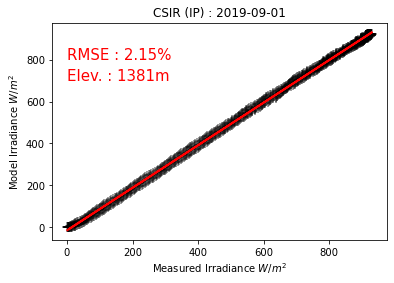

In [39]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (IP) : 2019-09-01')
plt.text(1, 800, 'RMSE : 2.15%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 6. Solis Simplified Model

In [40]:
A_T = exl_1.iloc[384: 1075,5]
R_H = exl_1.iloc[384: 1075,6]


In [41]:
A_T.head()

384    6.536
385    6.548
386    6.584
387    6.604
388    6.613
Name: Temp_Avg, dtype: float64

In [42]:
R_H.head()

384    35.66
385    35.76
386    35.67
387    35.73
388    35.73
Name: RH, dtype: float64

In [43]:
# Precipitable water (cm)
p_w = np.mean(pvlib.atmosphere.gueymard94_pw(A_T, R_H))

In [44]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
apparent_elevation = solpos['apparent_elevation']
# y_dni = exl_1.iloc[413: 1046,4]


dg = pvlib.clearsky.simplified_solis(apparent_elevation, aod700= 0.00260, precipitable_water= 0.9, pressure=86800, dni_extra=1364)
df_out = dg['ghi']

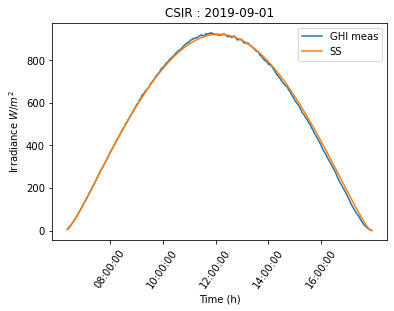

In [45]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'SS')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-01')
plt.legend()

In [46]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
11.108346256195954
Below is the mean absolute error
8.47513141329536
Below is the mean square error
123.39535654754269
Below is the RMSE percent
1.9735443479080559
Below is the MAE percent
1.5057189713687313


In [47]:
a = 37
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(421    07:01:00
 422    07:02:00
 423    07:03:00
 424    07:04:00
 425    07:05:00
 426    07:06:00
 427    07:07:00
 428    07:08:00
 429    07:09:00
 430    07:10:00
 431    07:11:00
 432    07:12:00
 433    07:13:00
 434    07:14:00
 435    07:15:00
 436    07:16:00
 437    07:17:00
 438    07:18:00
 439    07:19:00
 440    07:20:00
 441    07:21:00
 442    07:22:00
 443    07:23:00
 444    07:24:00
 445    07:25:00
 446    07:26:00
 447    07:27:00
 448    07:28:00
 449    07:29:00
 450    07:30:00
 451    07:31:00
 452    07:32:00
 453    07:33:00
 454    07:34:00
 455    07:35:00
 456    07:36:00
 457    07:37:00
 458    07:38:00
 459    07:39:00
 460    07:40:00
 461    07:41:00
 462    07:42:00
 463    07:43:00
 464    07:44:00
 465    07:45:00
 466    07:46:00
 467    07:47:00
 468    07:48:00
 469    07:49:00
 470    07:50:00
 471    07:51:00
 472    07:52:00
 473    07:53:00
 474    07:54:00
 475    07:55:00
 476    07:56:00
 477    07:57:00
 478    07:58:00
 479    07:59:

In [48]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
1.6345769540214765 1.834805326512432 4.28610040352601 7.3680426694539864 9.002228732758512 3.026648165738806 4.970764999002542 12.161442591762514 17.33829938122199 21.007870234942533
rmse hourly beginning from 7
1.917880177491012 2.0429554042397045 4.829615781708891 7.677683771214234 9.75222610779634 3.5996315126161713 6.191452598315613 12.70793590496576 17.419232963268616 21.09085440322046
Below is the RMSE percent
0.3407367304688667 0.362957995553714 0.8580449968637519 1.3640418710619249 1.7326117021089131 0.6395220550775433 1.0999932842326479 2.2577325643620636 3.0947566781488742 3.7470686941191453
Below is the MAE percent
0.2904041730811659 0.32597738656467107 0.7614823152660627 1.3090300419232619 1.5993647681086167 0.537723999849968 0.8831220185532905 2.160640813297837 3.0803777589362165 3.732325461193776


Text(1, 700, 'Elev. : 1381m')

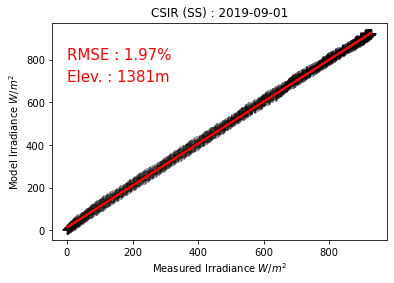

In [49]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'SS', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (SS) : 2019-09-01')
plt.text(1, 800, 'RMSE : 1.97%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 7. Bird - Hulstrom Model

In [50]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
zenith = solpos['zenith']

airmass_relative = airmass

bd = pvlib.clearsky.bird(zenith, airmass_relative, aod380 = 0.0054, aod500 = 0.07, precipitable_water = 0.5
                         , ozone=0.3, pressure= 86800 , dni_extra=1364.0, asymmetry=0.85, albedo=0.25)
df_out = bd['ghi'].fillna(0)

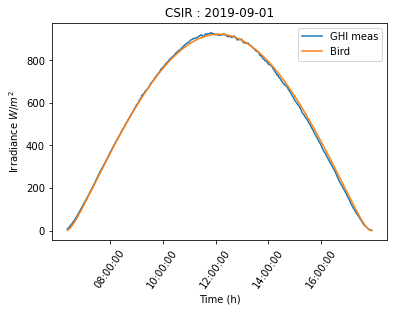

In [51]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'Bird')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-01')
plt.legend()

In [52]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
10.090992747604346
Below is the mean absolute error
8.220764942343399
Below is the mean square error
101.8281346322035
Below is the RMSE percent
1.792798067552823
Below is the MAE percent
1.4605274100447805


In [53]:
a = 37
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(421    07:01:00
 422    07:02:00
 423    07:03:00
 424    07:04:00
 425    07:05:00
 426    07:06:00
 427    07:07:00
 428    07:08:00
 429    07:09:00
 430    07:10:00
 431    07:11:00
 432    07:12:00
 433    07:13:00
 434    07:14:00
 435    07:15:00
 436    07:16:00
 437    07:17:00
 438    07:18:00
 439    07:19:00
 440    07:20:00
 441    07:21:00
 442    07:22:00
 443    07:23:00
 444    07:24:00
 445    07:25:00
 446    07:26:00
 447    07:27:00
 448    07:28:00
 449    07:29:00
 450    07:30:00
 451    07:31:00
 452    07:32:00
 453    07:33:00
 454    07:34:00
 455    07:35:00
 456    07:36:00
 457    07:37:00
 458    07:38:00
 459    07:39:00
 460    07:40:00
 461    07:41:00
 462    07:42:00
 463    07:43:00
 464    07:44:00
 465    07:45:00
 466    07:46:00
 467    07:47:00
 468    07:48:00
 469    07:49:00
 470    07:50:00
 471    07:51:00
 472    07:52:00
 473    07:53:00
 474    07:54:00
 475    07:55:00
 476    07:56:00
 477    07:57:00
 478    07:58:00
 479    07:59:

In [54]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
4.185063595025617 2.3666525654370725 3.712768839108265 6.9259563221921745 8.965095716556814 3.0028374412274714 5.24822115025444 12.82234716928752 17.29152893217261 17.463326669252776
rmse hourly beginning from 7
4.33480036642329 2.6086549559606476 4.282192005027188 7.2835731984266925 9.698406314134397 3.5807384903955475 6.502938134998291 13.346765919653018 17.360960382560567 17.60739449524438
Below is the RMSE percent
0.7701345065376168 0.46346198842216363 0.7607879366800134 1.294022925357759 1.7230499053177968 0.6361654602831007 1.1553328015827056 2.371229149333642 3.0844037849600934 3.128186058126777
Below is the MAE percent
0.7435317925016685 0.4204670691981032 0.6596223945958004 1.230487566580524 1.5927675976067732 0.5334937103275533 0.9324157663773723 2.278059235752351 3.0720683712702495 3.1025905070750133


Text(1, 700, 'Elev. : 1381m')

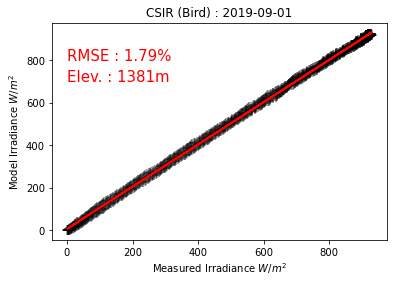

In [55]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'Bird', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (Bird) : 2019-09-01')
plt.text(1, 800, 'RMSE : 1.79%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# Day 2

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pvlib
from pvlib import atmosphere, tools

naive_times = pd.date_range(start = '2019-09-02 06:17', end = '2019-09-02 17:55', freq = '1min')
coordinates = [(-25.750233, 28.278718, 'South Africa-Pretoria', 1381, 'Etc/GMT-2')]


sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
# inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = {'module': module,'surface_azimuth': 180}

for latitude, longitude, name, altitude, timezone in coordinates:

	times = naive_times.tz_localize(timezone)
	system['surface_tilt'] = latitude

	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

exl_1 = pd.read_csv('csir_1.csv')
x = exl_1.iloc[1817: 2516,1]
y = exl_1.iloc[1817: 2516,2]
c = exl_1.iloc[1817: 2516,1]
c1 = exl_1.iloc[1817: 2516,0]

apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1145.0 * cos_zenith[cos_zen_gte_0] * np.exp(-0.059/cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])


import ephem
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
sunset.head()

,sunrise,sunset,transit
2019-09-02 06:17:00+02:00,2019-09-02 06:18:22.229044+02:00,2019-09-02 17:55:19.858298+02:00,2019-09-02 12:06:40.676440+02:00
2019-09-02 06:18:00+02:00,2019-09-02 06:18:22.229002+02:00,2019-09-02 17:55:19.858298+02:00,2019-09-02 12:06:40.676440+02:00
2019-09-02 06:19:00+02:00,2019-09-03 06:17:20.053655+02:00,2019-09-02 17:55:19.858298+02:00,2019-09-02 12:06:40.676440+02:00
2019-09-02 06:20:00+02:00,2019-09-03 06:17:20.053655+02:00,2019-09-02 17:55:19.858298+02:00,2019-09-02 12:06:40.676440+02:00
2019-09-02 06:21:00+02:00,2019-09-03 06:17:20.053655+02:00,2019-09-02 17:55:19.858298+02:00,2019-09-02 12:06:40.676440+02:00


In [57]:
x

1817    06:17:00
1818    06:18:00
1819    06:19:00
1820    06:20:00
1821    06:21:00
          ...   
2511    17:51:00
2512    17:52:00
2513    17:53:00
2514    17:54:00
2515    17:55:00
Name: TMESTAMP, Length: 699, dtype: object

# 1. Haurwitz model

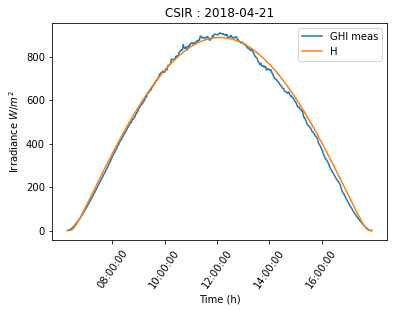

In [58]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'H')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2018-04-21')
plt.legend()

In [59]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
20.597988443725455
Below is the mean absolute error
16.9681233381922
Below is the mean square error
424.27712792784746
Below is the RMSE percent
3.8892412723571144
Below is the MAE percent
3.2038626384143765


In [60]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(1861    07:01:00
 1862    07:02:00
 1863    07:03:00
 1864    07:04:00
 1865    07:05:00
 1866    07:06:00
 1867    07:07:00
 1868    07:08:00
 1869    07:09:00
 1870    07:10:00
 1871    07:11:00
 1872    07:12:00
 1873    07:13:00
 1874    07:14:00
 1875    07:15:00
 1876    07:16:00
 1877    07:17:00
 1878    07:18:00
 1879    07:19:00
 1880    07:20:00
 1881    07:21:00
 1882    07:22:00
 1883    07:23:00
 1884    07:24:00
 1885    07:25:00
 1886    07:26:00
 1887    07:27:00
 1888    07:28:00
 1889    07:29:00
 1890    07:30:00
 1891    07:31:00
 1892    07:32:00
 1893    07:33:00
 1894    07:34:00
 1895    07:35:00
 1896    07:36:00
 1897    07:37:00
 1898    07:38:00
 1899    07:39:00
 1900    07:40:00
 1901    07:41:00
 1902    07:42:00
 1903    07:43:00
 1904    07:44:00
 1905    07:45:00
 1906    07:46:00
 1907    07:47:00
 1908    07:48:00
 1909    07:49:00
 1910    07:50:00
 1911    07:51:00
 1912    07:52:00
 1913    07:53:00
 1914    07:54:00
 1915    07:55:00
 1916    0

In [61]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
17.00712801825975 13.758099118250746 6.493352587902445 9.297323436213377 10.838425495328709 10.58751886223945 22.0841029735366 29.963869492452567 24.25587107824494 36.554150966659265
rmse hourly beginning from 7
17.212110783545768 13.86830729641382 7.543706008759339 11.527834331460356 12.149400160556354 12.046745802180935 26.159844500880094 30.96215587034978 24.91785187565202 36.74782189665521
Below is the RMSE percent
3.249931507954651 2.6185660440728253 1.424376600460347 2.1766459955689683 2.294007915768677 2.2746250731929667 4.939411787186419 5.8461676887094525 4.704903015070293 6.938597231480459
Below is the MAE percent
3.2112273678367784 2.5977569152477393 1.2260524832234279 1.7554886065386168 2.0464741923204985 1.9990988655702708 4.169844302142372 5.657674691290938 4.579910079676752 6.902028953162706


Text(1, 700, 'Elev. : 1381m')

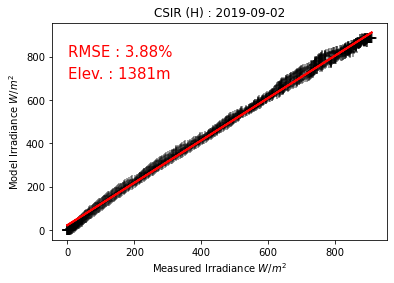

In [62]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (H) : 2019-09-02')
plt.text(1, 800, 'RMSE : 3.88%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

In [63]:
#sns.regplot(x=y, y=df_out, color='black', marker='+')

# 2. ABCG MODEL

In [64]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1120 * (cos_zenith[cos_zen_gte_0] **1.15))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (939.39 * (cos_zenith[cos_zen_gte_0] **1.15))
# ABCG_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

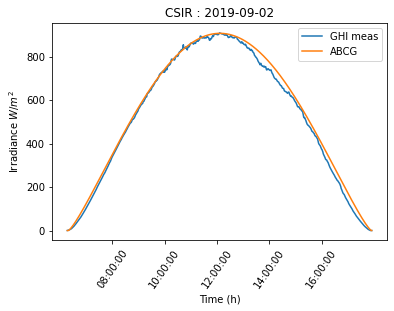

In [65]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'ABCG')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-02')
plt.legend()

In [66]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
22.6186877678351
Below is the mean absolute error
18.348291815062506
Below is the mean square error
511.6050363388133
Below is the RMSE percent
4.270782762771211
Below is the MAE percent
3.464461299187263


In [67]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(1861    07:01:00
 1862    07:02:00
 1863    07:03:00
 1864    07:04:00
 1865    07:05:00
 1866    07:06:00
 1867    07:07:00
 1868    07:08:00
 1869    07:09:00
 1870    07:10:00
 1871    07:11:00
 1872    07:12:00
 1873    07:13:00
 1874    07:14:00
 1875    07:15:00
 1876    07:16:00
 1877    07:17:00
 1878    07:18:00
 1879    07:19:00
 1880    07:20:00
 1881    07:21:00
 1882    07:22:00
 1883    07:23:00
 1884    07:24:00
 1885    07:25:00
 1886    07:26:00
 1887    07:27:00
 1888    07:28:00
 1889    07:29:00
 1890    07:30:00
 1891    07:31:00
 1892    07:32:00
 1893    07:33:00
 1894    07:34:00
 1895    07:35:00
 1896    07:36:00
 1897    07:37:00
 1898    07:38:00
 1899    07:39:00
 1900    07:40:00
 1901    07:41:00
 1902    07:42:00
 1903    07:43:00
 1904    07:44:00
 1905    07:45:00
 1906    07:46:00
 1907    07:47:00
 1908    07:48:00
 1909    07:49:00
 1910    07:50:00
 1911    07:51:00
 1912    07:52:00
 1913    07:53:00
 1914    07:54:00
 1915    07:55:00
 1916    0

In [68]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
18.5981427942383 9.538010976377578 6.224628725405147 6.07737315877483 8.316281830779856 7.978592237388004 34.75222780536824 33.73874250213349 20.683987332305776 35.39901976275851
rmse hourly beginning from 7
18.80438768461802 9.771016641878699 7.076122978634862 7.495960571558945 10.2102245993295 9.573118866779192 36.882340161890085 35.0089345007782 21.333207944944476 35.633511695504204
Below is the RMSE percent
3.550579751232869 1.8449297270121998 1.3360891822989935 1.41536147136491 1.927859461628381 1.807563350352293 6.963996507262495 6.610266499258567 4.028062887690813 6.728197015150343
Below is the MAE percent
3.5116373009994857 1.80093439934048 1.1753129685496018 1.1475086793643916 1.570251707694069 1.5064903211172573 6.561796024706817 6.3704332185261645 3.905479286460152 6.683921055613763


Text(1, 700, 'Elev. : 1381m')

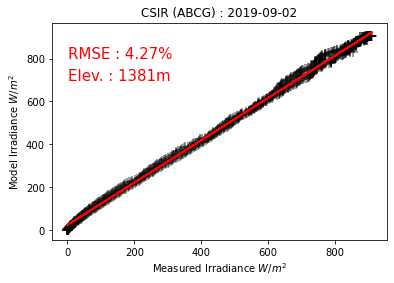

In [69]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (ABCG) : 2019-09-02')
plt.text(1, 800, 'RMSE : 4.27%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 3. Berger Duffie Model

In [80]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1285.0 * (0.86*cos_zenith[cos_zen_gte_0])) 

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (1390* (0.70*cos_zenith[cos_zen_gte_0]))
# BD_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

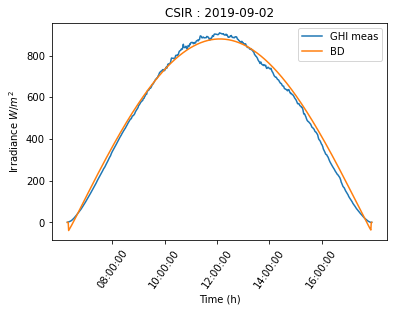

In [81]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'BD')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-02')
plt.legend()

In [82]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
40.400281962263975
Below is the mean absolute error
33.935516255648146
Below is the mean square error
1632.182782630432
Below is the RMSE percent
7.628242168004781
Below is the MAE percent
6.407587361299701


In [83]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(1861    07:01:00
 1862    07:02:00
 1863    07:03:00
 1864    07:04:00
 1865    07:05:00
 1866    07:06:00
 1867    07:07:00
 1868    07:08:00
 1869    07:09:00
 1870    07:10:00
 1871    07:11:00
 1872    07:12:00
 1873    07:13:00
 1874    07:14:00
 1875    07:15:00
 1876    07:16:00
 1877    07:17:00
 1878    07:18:00
 1879    07:19:00
 1880    07:20:00
 1881    07:21:00
 1882    07:22:00
 1883    07:23:00
 1884    07:24:00
 1885    07:25:00
 1886    07:26:00
 1887    07:27:00
 1888    07:28:00
 1889    07:29:00
 1890    07:30:00
 1891    07:31:00
 1892    07:32:00
 1893    07:33:00
 1894    07:34:00
 1895    07:35:00
 1896    07:36:00
 1897    07:37:00
 1898    07:38:00
 1899    07:39:00
 1900    07:40:00
 1901    07:41:00
 1902    07:42:00
 1903    07:43:00
 1904    07:44:00
 1905    07:45:00
 1906    07:46:00
 1907    07:47:00
 1908    07:48:00
 1909    07:49:00
 1910    07:50:00
 1911    07:51:00
 1912    07:52:00
 1913    07:53:00
 1914    07:54:00
 1915    07:55:00
 1916    0

In [85]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
55.58749608090785 38.93619628782109 16.01599095656522 9.130362831749991 13.04024850041251 13.633790911668001 23.329459328586516 39.742557263884066 46.302213438605584 72.43104772576363
rmse hourly beginning from 7
55.65473768121702 39.16516285891764 18.56888435196824 11.05440940374566 14.376655336929858 15.084408746327444 27.984871813464764 40.32973625457602 47.03070525689365 72.57818961288228
Below is the RMSE percent
10.508535985606605 7.3950312306292645 3.5061128226479963 2.087255530414515 2.7145505711686786 2.848186133592691 5.284007161956884 7.614921970322507 8.880175870226422 13.7039639228154
Below is the MAE percent
10.49583965810568 7.35179855085902 3.0240842796931706 1.7239636799415006 2.462214832684139 2.574285467593753 4.404988202144305 7.504052854578546 8.742624552824674 13.676181098204257


Text(1, 700, 'Elev. : 1381m')

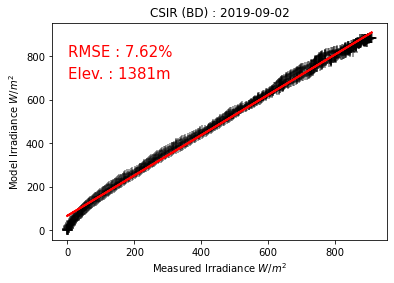

In [86]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'BD', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (BD) : 2019-09-02')
plt.text(1, 800, 'RMSE : 7.62%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 4. Kasten Czeplak Model

In [140]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = ((1150.0 * cos_zenith[cos_zen_gte_0]) ) -70

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

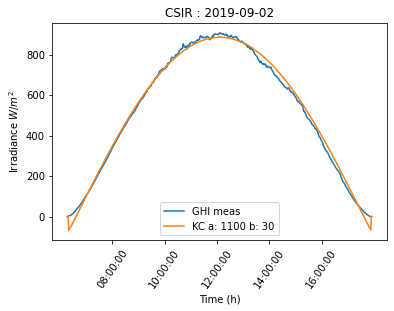

In [141]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'KC a: 1100 b: 30')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-02')
plt.legend()

In [134]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
21.036209891500064
Below is the mean absolute error
16.875827570047637
Below is the mean square error
442.5221265992451
Below is the RMSE percent
3.971984737612153
Below is the MAE percent
3.1864356691881124


In [90]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(1861    07:01:00
 1862    07:02:00
 1863    07:03:00
 1864    07:04:00
 1865    07:05:00
 1866    07:06:00
 1867    07:07:00
 1868    07:08:00
 1869    07:09:00
 1870    07:10:00
 1871    07:11:00
 1872    07:12:00
 1873    07:13:00
 1874    07:14:00
 1875    07:15:00
 1876    07:16:00
 1877    07:17:00
 1878    07:18:00
 1879    07:19:00
 1880    07:20:00
 1881    07:21:00
 1882    07:22:00
 1883    07:23:00
 1884    07:24:00
 1885    07:25:00
 1886    07:26:00
 1887    07:27:00
 1888    07:28:00
 1889    07:29:00
 1890    07:30:00
 1891    07:31:00
 1892    07:32:00
 1893    07:33:00
 1894    07:34:00
 1895    07:35:00
 1896    07:36:00
 1897    07:37:00
 1898    07:38:00
 1899    07:39:00
 1900    07:40:00
 1901    07:41:00
 1902    07:42:00
 1903    07:43:00
 1904    07:44:00
 1905    07:45:00
 1906    07:46:00
 1907    07:47:00
 1908    07:48:00
 1909    07:49:00
 1910    07:50:00
 1911    07:51:00
 1912    07:52:00
 1913    07:53:00
 1914    07:54:00
 1915    07:55:00
 1916    0

In [92]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
36.669788242070595 28.68926001612305 13.16344831161223 7.616307693594252 8.853981420031335 8.911705183140363 26.080488038193348 38.12236966977125 37.85719876982364 55.52909973675873
rmse hourly beginning from 7
36.75502086059246 28.7785721176876 15.132004521251558 9.342751266516027 10.153442019094557 10.32982192695833 30.11679246782807 38.8004630984042 38.43349529798979 55.64891466968257
Below is the RMSE percent
6.939956515069701 5.433870921202082 2.8571730039723113 1.7640661330776475 1.9171379702942144 1.950441417334806 5.6865490810861825 7.326169877275138 7.256880280434307 10.50743650461354
Below is the MAE percent
6.923863185441327 5.4170073176286175 2.4854769969373924 1.4380850006701074 1.6717782931837 1.682677495428266 4.9244279730750184 7.198134610318922 7.148065953803171 10.484813461424388


Text(1, 700, 'Elev. : 1381m')

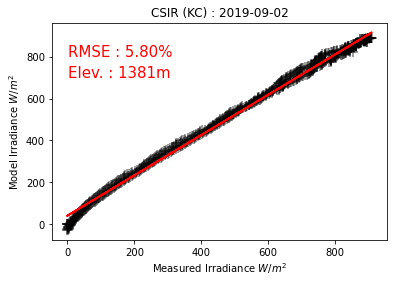

In [93]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (KC) : 2019-09-02')
plt.text(1, 800, 'RMSE : 5.80%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 5. Ineichen - Perez Model

In [94]:
tl = 3.6

linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

relative_airmass = pvlib.atmosphere.get_relative_airmass(apparent_zenith, model='kastenyoung1989')

cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl, dni_extra=dni_extra, altitude=altitude)


df_out = cs['ghi']


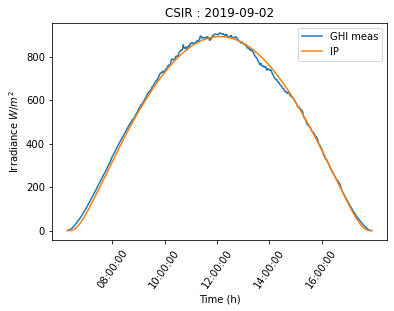

In [95]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'IP')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-02')
plt.legend()

In [96]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
15.162423705779329
Below is the mean absolute error
12.493891872824095
Below is the mean square error
229.89909263357896
Below is the RMSE percent
2.8629166496812153
Below is the MAE percent
2.3590536550163264


In [97]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(1861    07:01:00
 1862    07:02:00
 1863    07:03:00
 1864    07:04:00
 1865    07:05:00
 1866    07:06:00
 1867    07:07:00
 1868    07:08:00
 1869    07:09:00
 1870    07:10:00
 1871    07:11:00
 1872    07:12:00
 1873    07:13:00
 1874    07:14:00
 1875    07:15:00
 1876    07:16:00
 1877    07:17:00
 1878    07:18:00
 1879    07:19:00
 1880    07:20:00
 1881    07:21:00
 1882    07:22:00
 1883    07:23:00
 1884    07:24:00
 1885    07:25:00
 1886    07:26:00
 1887    07:27:00
 1888    07:28:00
 1889    07:29:00
 1890    07:30:00
 1891    07:31:00
 1892    07:32:00
 1893    07:33:00
 1894    07:34:00
 1895    07:35:00
 1896    07:36:00
 1897    07:37:00
 1898    07:38:00
 1899    07:39:00
 1900    07:40:00
 1901    07:41:00
 1902    07:42:00
 1903    07:43:00
 1904    07:44:00
 1905    07:45:00
 1906    07:46:00
 1907    07:47:00
 1908    07:48:00
 1909    07:49:00
 1910    07:50:00
 1911    07:51:00
 1912    07:52:00
 1913    07:53:00
 1914    07:54:00
 1915    07:55:00
 1916    0

In [99]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
22.000038832503137 16.036067308356003 11.919013832153949 12.119330821434188 8.886071086242305 7.476624918840686 20.108660071764806 17.644927426997494 4.811880603940544 3.9894130980127174
rmse hourly beginning from 7
22.112342541208854 16.729915170354506 12.578518069992041 13.854882272213652 10.11762661369499 8.827603684252079 23.55616561326049 20.212043274253237 5.9151533796077205 5.02464886208324
Below is the RMSE percent
4.175176400099632 3.1588849921603246 2.375032482252171 2.6160311772170477 1.9103754287360053 1.6667977399153897 4.4477941024129475 3.816368434017628 1.1168788990801148 0.9487369015137611
Below is the MAE percent
4.153971600411044 3.0278750273283777 2.2505071623112487 2.2883303266649673 1.6778373534936344 1.4117105799788279 3.796847973605439 3.3316544566626987 0.9085627314351202 0.7532672481909041


Text(1, 700, 'Elev. : 1381m')

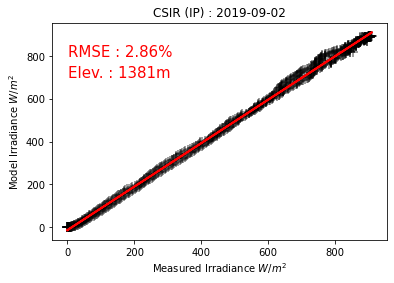

In [100]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (IP) : 2019-09-02')
plt.text(1, 800, 'RMSE : 2.86%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 6. Solis Simplified Model

In [101]:
A_T = exl_1.iloc[1817: 2516,5]
R_H = exl_1.iloc[1817: 2516,6]


In [102]:
A_T.head()

1817    9.48
1818    9.44
1819    9.40
1820    9.35
1821    9.34
Name: Temp_Avg, dtype: float64

In [103]:
R_H.head()

1817    75.39
1818    75.50
1819    75.76
1820    76.14
1821    76.77
Name: RH, dtype: float64

In [104]:
# Precipitable water (cm)
p_w = np.mean(pvlib.atmosphere.gueymard94_pw(A_T, R_H))

In [105]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
apparent_elevation = solpos['apparent_elevation']
# y_dni = exl_1.iloc[413: 1046,4]


dg = pvlib.clearsky.simplified_solis(apparent_elevation, aod700= 0.00260, precipitable_water= 1.9, pressure=86800, dni_extra=1364)
df_out = dg['ghi']

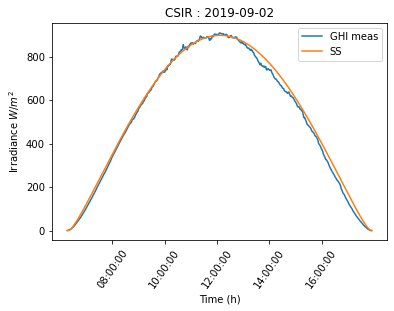

In [106]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'SS')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-02')
plt.legend()

In [107]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(1861    07:01:00
 1862    07:02:00
 1863    07:03:00
 1864    07:04:00
 1865    07:05:00
 1866    07:06:00
 1867    07:07:00
 1868    07:08:00
 1869    07:09:00
 1870    07:10:00
 1871    07:11:00
 1872    07:12:00
 1873    07:13:00
 1874    07:14:00
 1875    07:15:00
 1876    07:16:00
 1877    07:17:00
 1878    07:18:00
 1879    07:19:00
 1880    07:20:00
 1881    07:21:00
 1882    07:22:00
 1883    07:23:00
 1884    07:24:00
 1885    07:25:00
 1886    07:26:00
 1887    07:27:00
 1888    07:28:00
 1889    07:29:00
 1890    07:30:00
 1891    07:31:00
 1892    07:32:00
 1893    07:33:00
 1894    07:34:00
 1895    07:35:00
 1896    07:36:00
 1897    07:37:00
 1898    07:38:00
 1899    07:39:00
 1900    07:40:00
 1901    07:41:00
 1902    07:42:00
 1903    07:43:00
 1904    07:44:00
 1905    07:45:00
 1906    07:46:00
 1907    07:47:00
 1908    07:48:00
 1909    07:49:00
 1910    07:50:00
 1911    07:51:00
 1912    07:52:00
 1913    07:53:00
 1914    07:54:00
 1915    07:55:00
 1916    0

In [109]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
18.058698712318794 10.889049051940884 5.979677435229485 6.178558086718226 5.194402772262295 5.031127920905814 28.62156225355949 31.6636803818889 21.76009861616196 35.74010458546128
rmse hourly beginning from 7
18.15053079543638 11.061767481252415 6.846714097414821 7.810247255649209 6.905647914798953 5.7724769176911686 31.527959824844345 32.809887348523034 22.41835888180363 35.93099010645483
Below is the RMSE percent
3.4271207442250797 2.088644857280226 1.2927729870538192 1.4747040011685162 1.3039006675811742 1.0899392206840541 5.9530008436990824 6.1950499858705586 4.232957352113878 6.784365864679764
Below is the MAE percent
3.409781326409441 2.0560327580157596 1.1290621091479154 1.1666140691442277 0.9807892504805602 0.9499602550974194 5.404224859141093 5.978627132081907 4.1086669147208905 6.748323517701478


In [110]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
21.08236360780223
Below is the mean absolute error
16.774500805273178
Below is the mean square error
444.4660552915838
Below is the RMSE percent
3.9806993234468555
Below is the MAE percent
3.167303498266088


Text(1, 700, 'Elev. : 1381m')

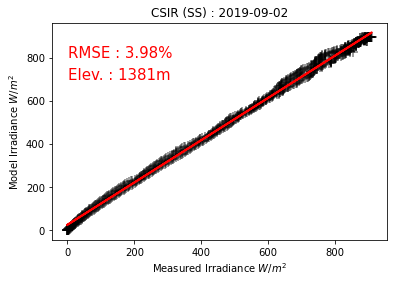

In [111]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'SS', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (SS) : 2019-09-02')
plt.text(1, 800, 'RMSE : 3.98%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 7. Bird - Hulstrom Model

In [112]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
zenith = solpos['zenith']

airmass_relative = airmass

bd = pvlib.clearsky.bird(zenith, airmass_relative, aod380 = 0.0054, aod500 = 0.07, precipitable_water = 1.5
                         , ozone=0.3, pressure= 86800 , dni_extra=1364.0, asymmetry=0.85, albedo=0.25)
df_out = bd['ghi'].fillna(0)

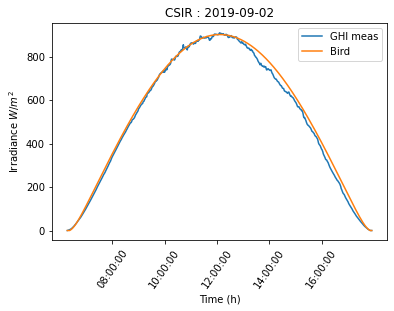

In [113]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'Bird')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-02')
plt.legend()

In [114]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
22.136531333105598
Below is the mean absolute error
17.484648823185363
Below is the mean square error
490.02601946156597
Below is the RMSE percent
4.179743644519168
Below is the MAE percent
3.3013912024267347


In [115]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(1861    07:01:00
 1862    07:02:00
 1863    07:03:00
 1864    07:04:00
 1865    07:05:00
 1866    07:06:00
 1867    07:07:00
 1868    07:08:00
 1869    07:09:00
 1870    07:10:00
 1871    07:11:00
 1872    07:12:00
 1873    07:13:00
 1874    07:14:00
 1875    07:15:00
 1876    07:16:00
 1877    07:17:00
 1878    07:18:00
 1879    07:19:00
 1880    07:20:00
 1881    07:21:00
 1882    07:22:00
 1883    07:23:00
 1884    07:24:00
 1885    07:25:00
 1886    07:26:00
 1887    07:27:00
 1888    07:28:00
 1889    07:29:00
 1890    07:30:00
 1891    07:31:00
 1892    07:32:00
 1893    07:33:00
 1894    07:34:00
 1895    07:35:00
 1896    07:36:00
 1897    07:37:00
 1898    07:38:00
 1899    07:39:00
 1900    07:40:00
 1901    07:41:00
 1902    07:42:00
 1903    07:43:00
 1904    07:44:00
 1905    07:45:00
 1906    07:46:00
 1907    07:47:00
 1908    07:48:00
 1909    07:49:00
 1910    07:50:00
 1911    07:51:00
 1912    07:52:00
 1913    07:53:00
 1914    07:54:00
 1915    07:55:00
 1916    0

In [117]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
16.392659760846254 14.07279228092199 8.944037220548072 6.2044830085466245 5.488785467711901 5.075198105900744 32.61399534928693 36.070806856050055 25.448907013906254 35.59489007330666
rmse hourly beginning from 7
16.51195873312718 14.24585347155067 10.100388669534917 7.632859157862054 7.363222783896614 6.418396044968588 35.24523810922391 37.082544909716916 25.98825364559453 35.78517861382626
Below is the RMSE percent
3.117731207966478 2.689853013214227 1.9071206194588228 1.441210191177139 1.3902983792290868 1.2118994468136823 6.654884533164394 7.001798478571356 4.907012592568026 6.756834240576549
Below is the MAE percent
3.095205586689799 2.6571761949377626 1.6887823194332412 1.1715091236410833 1.0363735776656309 0.9582814357229433 6.158062332904588 6.8107655820394575 4.805175018195183 6.720904613396335


Text(1, 700, 'Elev. : 1381m')

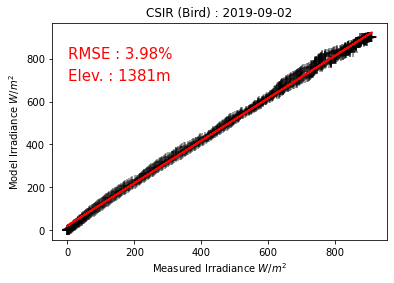

In [118]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'Bird', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (Bird) : 2019-09-02')
plt.text(1, 800, 'RMSE : 3.98%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# Day 3


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pvlib
from pvlib import atmosphere, tools

naive_times = pd.date_range(start = '2019-09-08 06:10', end = '2019-09-08 17:57', freq = '1min')
coordinates = [(-25.750233, 28.278718, 'South Africa-Pretoria', 1381, 'Etc/GMT-2')]


sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
# inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = {'module': module,'surface_azimuth': 180}

for latitude, longitude, name, altitude, timezone in coordinates:

	times = naive_times.tz_localize(timezone)
	system['surface_tilt'] = latitude

	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

exl_1 = pd.read_csv('csir_1.csv')
x = exl_1.iloc[3250:3958,1]
y = exl_1.iloc[3250:3958,2]
c = exl_1.iloc[3250:3958,1]
c1 = exl_1.iloc[3250:3958,0]

apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1200.0 * cos_zenith[cos_zen_gte_0] * np.exp(-0.089/cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])


import ephem
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
sunset.head()

,sunrise,sunset,transit
2019-09-08 06:10:00+02:00,2019-09-08 06:12:02.834098+02:00,2019-09-08 17:57:39.907632+02:00,2019-09-08 12:04:40.647160+02:00
2019-09-08 06:11:00+02:00,2019-09-08 06:12:02.834099+02:00,2019-09-08 17:57:39.907632+02:00,2019-09-08 12:04:40.647160+02:00
2019-09-08 06:12:00+02:00,2019-09-08 06:12:02.834098+02:00,2019-09-08 17:57:39.907632+02:00,2019-09-08 12:04:40.647160+02:00
2019-09-08 06:13:00+02:00,2019-09-09 06:10:58.302704+02:00,2019-09-08 17:57:39.907632+02:00,2019-09-08 12:04:40.647160+02:00
2019-09-08 06:14:00+02:00,2019-09-09 06:10:58.302704+02:00,2019-09-08 17:57:39.907632+02:00,2019-09-08 12:04:40.647160+02:00


In [120]:
x

3250    06:10:00
3251    06:11:00
3252    06:12:00
3253    06:13:00
3254    06:14:00
          ...   
3953    17:53:00
3954    17:54:00
3955    17:55:00
3956    17:56:00
3957    17:57:00
Name: TMESTAMP, Length: 708, dtype: object

# 1. Haurwitz model

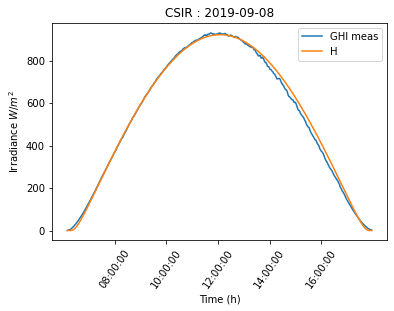

In [121]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'H')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-08')
plt.legend()

In [122]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
17.287679298453316
Below is the mean absolute error
12.26311477198573
Below is the mean square error
298.8638555261713
Below is the RMSE percent
3.1665524594489116
Below is the MAE percent
2.2462122053137503


In [123]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(3294    06:54:00
 3295    06:55:00
 3296    06:56:00
 3297    06:57:00
 3298    06:58:00
 3299    06:59:00
 3300    07:00:00
 3301    07:01:00
 3302    07:02:00
 3303    07:03:00
 3304    07:04:00
 3305    07:05:00
 3306    07:06:00
 3307    07:07:00
 3308    07:08:00
 3309    07:09:00
 3310    07:10:00
 3311    07:11:00
 3312    07:12:00
 3313    07:13:00
 3314    07:14:00
 3315    07:15:00
 3316    07:16:00
 3317    07:17:00
 3318    07:18:00
 3319    07:19:00
 3320    07:20:00
 3321    07:21:00
 3322    07:22:00
 3323    07:23:00
 3324    07:24:00
 3325    07:25:00
 3326    07:26:00
 3327    07:27:00
 3328    07:28:00
 3329    07:29:00
 3330    07:30:00
 3331    07:31:00
 3332    07:32:00
 3333    07:33:00
 3334    07:34:00
 3335    07:35:00
 3336    07:36:00
 3337    07:37:00
 3338    07:38:00
 3339    07:39:00
 3340    07:40:00
 3341    07:41:00
 3342    07:42:00
 3343    07:43:00
 3344    07:44:00
 3345    07:45:00
 3346    07:46:00
 3347    07:47:00
 3348    07:48:00
 3349    0

In [125]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
3.728548511246106 2.2611626460915737 1.7864898704512735 4.7019479496212275 6.267741015419041 3.1986407420626644 9.92725923548554 29.183765798036937 34.528341165134975 29.690824958189037
rmse hourly beginning from 7
4.554333970028752 2.586020217694258 2.1024118845997277 5.1199138332768905 6.910042092624408 3.7861224101012616 11.460712686895777 29.677048576347325 34.77005293835927 30.262347610019088
Below is the RMSE percent
0.8342089869307403 0.4736765727287057 0.3850949227493773 0.9378052115057416 1.2656997162859773 0.693497086711541 2.099237689408897 5.435890470679025 6.368766723766149 5.543098619476199
Below is the MAE percent
0.6829513814221001 0.4141730081050194 0.32722806776986924 0.8612471684042602 1.1480506078881076 0.5858891487869171 1.8183578376842102 5.345536770341567 6.324492822291726 5.438413865233613


Text(1, 700, 'Elev. : 1381m')

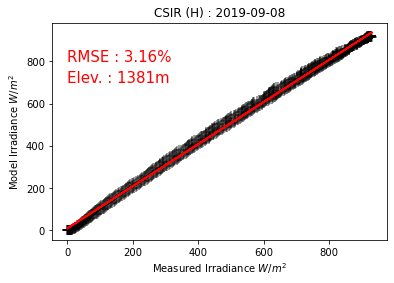

In [126]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (H) : 2019-09-08')
plt.text(1, 800, 'RMSE : 3.16%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

In [127]:
#sns.regplot(x=y, y=df_out, color='black', marker='+')

# 2. ABCG MODEL

In [128]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1129 * (cos_zenith[cos_zen_gte_0] **1.25))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (939.39 * (cos_zenith[cos_zen_gte_0] **1.15))
# ABCG_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

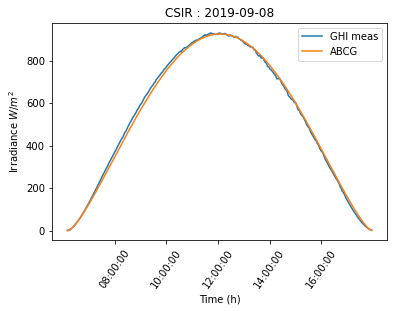

In [129]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'ABCG')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-08')
plt.legend()

In [130]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
13.513443229998511
Below is the mean absolute error
11.069960236600611
Below is the mean square error
182.61314793039259
Below is the RMSE percent
2.4752325721014174
Below is the MAE percent
2.0276642809046947


In [131]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(3294    06:54:00
 3295    06:55:00
 3296    06:56:00
 3297    06:57:00
 3298    06:58:00
 3299    06:59:00
 3300    07:00:00
 3301    07:01:00
 3302    07:02:00
 3303    07:03:00
 3304    07:04:00
 3305    07:05:00
 3306    07:06:00
 3307    07:07:00
 3308    07:08:00
 3309    07:09:00
 3310    07:10:00
 3311    07:11:00
 3312    07:12:00
 3313    07:13:00
 3314    07:14:00
 3315    07:15:00
 3316    07:16:00
 3317    07:17:00
 3318    07:18:00
 3319    07:19:00
 3320    07:20:00
 3321    07:21:00
 3322    07:22:00
 3323    07:23:00
 3324    07:24:00
 3325    07:25:00
 3326    07:26:00
 3327    07:27:00
 3328    07:28:00
 3329    07:29:00
 3330    07:30:00
 3331    07:31:00
 3332    07:32:00
 3333    07:33:00
 3334    07:34:00
 3335    07:35:00
 3336    07:36:00
 3337    07:37:00
 3338    07:38:00
 3339    07:39:00
 3340    07:40:00
 3341    07:41:00
 3342    07:42:00
 3343    07:43:00
 3344    07:44:00
 3345    07:45:00
 3346    07:46:00
 3347    07:47:00
 3348    07:48:00
 3349    0

In [133]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
14.269156857852202 24.188240788255357 22.979368615941357 14.123299013350461 5.716824187225584 1.8739744111459995 5.311071740652566 11.982414835674222 8.33038563627574 9.813702812077587
rmse hourly beginning from 7
15.508893216762162 24.252516632141553 23.08414150852851 14.687320575382689 6.188052021327482 2.332747683882546 6.296772665766731 12.751968835130995 8.86592574769001 10.167379491512843
Below is the RMSE percent
2.8407354805142924 4.442288919381117 4.228279794306311 2.6902495290304014 1.1334541212298774 0.42728510797472413 1.1533682819508468 2.3357547060300106 1.623955332405488 1.8623402238772944
Below is the MAE percent
2.613655249061492 4.430515631131883 4.209088736040028 2.586938735626503 1.0471401845079225 0.3432524503789004 0.9728192542406567 2.194796913628308 1.5258614339905563 1.79755791621292


Text(1, 700, 'Elev. : 1381m')

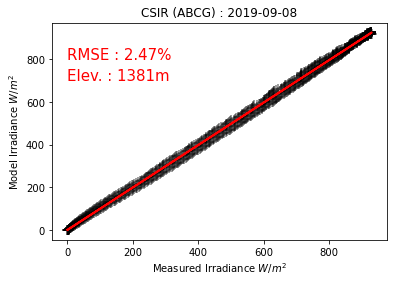

In [134]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (ABCG) : 2019-09-08')
plt.text(1, 800, 'RMSE : 2.47%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 3. Berger Duffie Model

In [135]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1200.0 * (0.90*cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (1390* (0.70*cos_zenith[cos_zen_gte_0]))
# BD_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

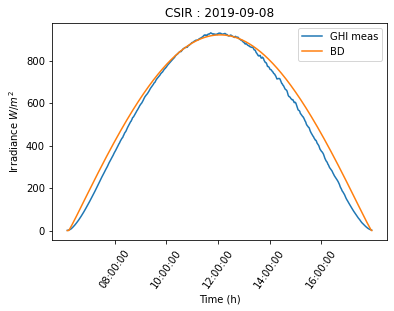

In [136]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'BD')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-08')
plt.legend()

In [137]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
45.354389017627526
Below is the mean absolute error
36.04190167794383
Below is the mean square error
2057.0206031622924
Below is the RMSE percent
8.307480119868963
Below is the MAE percent
6.601728920996335


In [138]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(3294    06:54:00
 3295    06:55:00
 3296    06:56:00
 3297    06:57:00
 3298    06:58:00
 3299    06:59:00
 3300    07:00:00
 3301    07:01:00
 3302    07:02:00
 3303    07:03:00
 3304    07:04:00
 3305    07:05:00
 3306    07:06:00
 3307    07:07:00
 3308    07:08:00
 3309    07:09:00
 3310    07:10:00
 3311    07:11:00
 3312    07:12:00
 3313    07:13:00
 3314    07:14:00
 3315    07:15:00
 3316    07:16:00
 3317    07:17:00
 3318    07:18:00
 3319    07:19:00
 3320    07:20:00
 3321    07:21:00
 3322    07:22:00
 3323    07:23:00
 3324    07:24:00
 3325    07:25:00
 3326    07:26:00
 3327    07:27:00
 3328    07:28:00
 3329    07:29:00
 3330    07:30:00
 3331    07:31:00
 3332    07:32:00
 3333    07:33:00
 3334    07:34:00
 3335    07:35:00
 3336    07:36:00
 3337    07:37:00
 3338    07:38:00
 3339    07:39:00
 3340    07:40:00
 3341    07:41:00
 3342    07:42:00
 3343    07:43:00
 3344    07:44:00
 3345    07:45:00
 3346    07:46:00
 3347    07:47:00
 3348    07:48:00
 3349    0

In [140]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
54.80598334555722 43.59703129589543 22.040862117837666 4.675087848944829 5.353400413312404 3.611786812119258 15.118065717209065 46.251941075995845 68.4661967330942 82.37124098491543
rmse hourly beginning from 7
54.83120649040895 44.01965670875131 22.919229694181098 6.121851839164461 6.520795529726707 4.247517090412895 17.10793795209529 47.071750874114755 69.009450832371 82.42441591638098
Below is the RMSE percent
10.043331367344917 8.062999654769405 4.198073200217034 1.121328355473508 1.194402138410037 0.77800990271734 3.133629567223257 8.622046136309928 12.640334337878059 15.097528848884147
Below is the MAE percent
10.038711290237611 7.985588134263921 4.037184224828687 0.8563272531056517 0.9805725194535421 0.6615643554855053 2.769148325375381 8.471883081587713 12.540827482477024 15.087788894370513


Text(1, 700, 'Elev. : 1381m')

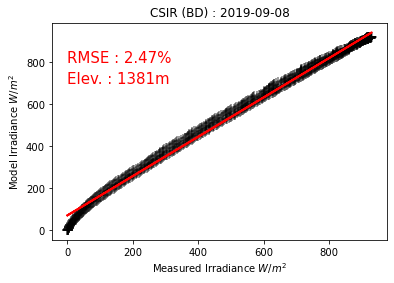

In [141]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'BD', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (BD) : 2019-09-08')
plt.text(1, 800, 'RMSE : 2.47%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 4. Kasten Czeplak Model

In [147]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = ((1175.0 * cos_zenith[cos_zen_gte_0]) - 80)

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

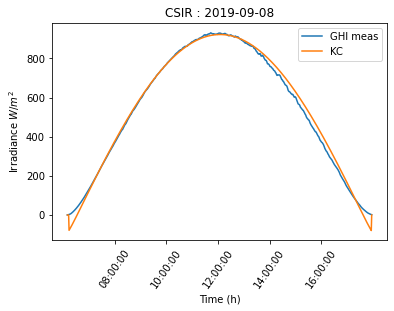

In [148]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'KC')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-08')
plt.legend()

In [149]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
24.11947108891783
Below is the mean absolute error
16.94930050356323
Below is the mean square error
581.7488856091431
Below is the RMSE percent
4.4179192116348895
Below is the MAE percent
3.104572237194301


In [145]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(3294    06:54:00
 3295    06:55:00
 3296    06:56:00
 3297    06:57:00
 3298    06:58:00
 3299    06:59:00
 3300    07:00:00
 3301    07:01:00
 3302    07:02:00
 3303    07:03:00
 3304    07:04:00
 3305    07:05:00
 3306    07:06:00
 3307    07:07:00
 3308    07:08:00
 3309    07:09:00
 3310    07:10:00
 3311    07:11:00
 3312    07:12:00
 3313    07:13:00
 3314    07:14:00
 3315    07:15:00
 3316    07:16:00
 3317    07:17:00
 3318    07:18:00
 3319    07:19:00
 3320    07:20:00
 3321    07:21:00
 3322    07:22:00
 3323    07:23:00
 3324    07:24:00
 3325    07:25:00
 3326    07:26:00
 3327    07:27:00
 3328    07:28:00
 3329    07:29:00
 3330    07:30:00
 3331    07:31:00
 3332    07:32:00
 3333    07:33:00
 3334    07:34:00
 3335    07:35:00
 3336    07:36:00
 3337    07:37:00
 3338    07:38:00
 3339    07:39:00
 3340    07:40:00
 3341    07:41:00
 3342    07:42:00
 3343    07:43:00
 3344    07:44:00
 3345    07:45:00
 3346    07:46:00
 3347    07:47:00
 3348    07:48:00
 3349    0

In [147]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
33.84367670243484 29.824339656805193 14.326774437533809 2.943536568446193 5.998942408014256 3.7883174415714795 13.077301453490787 40.50026727813989 57.25068929571037 64.31668541422317
rmse hourly beginning from 7
33.889505770774015 30.11644355219856 15.09572635455151 3.5160237924714104 6.961579771687025 4.430634539149532 14.968121811630693 41.203523590774246 57.67479413725123 64.41941084433401
Below is the RMSE percent
6.20747851665397 5.5163736412325015 2.7650564653550407 0.6440236190942839 1.2751397782846179 0.8115511894137496 2.741683375639123 7.547173724815714 10.56418609291659 11.79958514522108
Below is the MAE percent
6.199084090394765 5.462869507311228 2.6242089552876715 0.5391621859346394 1.0988152607556434 0.6938991465936448 2.39534528409553 7.418359557919725 10.486503588176607 11.780769116895375


Text(1, 700, 'Elev. : 1381m')

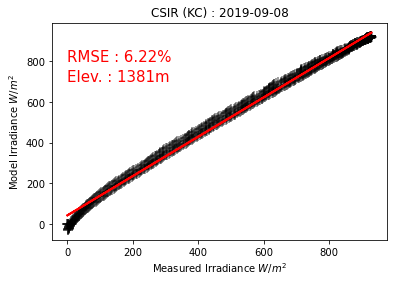

In [148]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (KC) : 2019-09-08')
plt.text(1, 800, 'RMSE : 6.22%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 5. Ineichen - Perez Model

In [149]:
tl = 3.5

linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

relative_airmass = pvlib.atmosphere.get_relative_airmass(apparent_zenith, model='kastenyoung1989')

cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl, dni_extra=dni_extra, altitude=altitude)


df_out = cs['ghi']


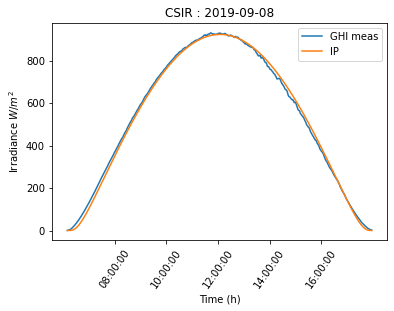

In [150]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'IP')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-08')
plt.legend()

In [151]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
14.947607081649858
Below is the mean absolute error
12.6799941619855
Below is the mean square error
223.43095746738896
Below is the RMSE percent
2.7379257302343083
Below is the MAE percent
2.322571237368182


In [152]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(3294    06:54:00
 3295    06:55:00
 3296    06:56:00
 3297    06:57:00
 3298    06:58:00
 3299    06:59:00
 3300    07:00:00
 3301    07:01:00
 3302    07:02:00
 3303    07:03:00
 3304    07:04:00
 3305    07:05:00
 3306    07:06:00
 3307    07:07:00
 3308    07:08:00
 3309    07:09:00
 3310    07:10:00
 3311    07:11:00
 3312    07:12:00
 3313    07:13:00
 3314    07:14:00
 3315    07:15:00
 3316    07:16:00
 3317    07:17:00
 3318    07:18:00
 3319    07:19:00
 3320    07:20:00
 3321    07:21:00
 3322    07:22:00
 3323    07:23:00
 3324    07:24:00
 3325    07:25:00
 3326    07:26:00
 3327    07:27:00
 3328    07:28:00
 3329    07:29:00
 3330    07:30:00
 3331    07:31:00
 3332    07:32:00
 3333    07:33:00
 3334    07:34:00
 3335    07:35:00
 3336    07:36:00
 3337    07:37:00
 3338    07:38:00
 3339    07:39:00
 3340    07:40:00
 3341    07:41:00
 3342    07:42:00
 3343    07:43:00
 3344    07:44:00
 3345    07:45:00
 3346    07:46:00
 3347    07:47:00
 3348    07:48:00
 3349    0

In [154]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
24.854912426002947 15.403253866344544 11.245895739681409 8.29391734285 6.027412065941207 2.5370943164864643 8.208140006775126 21.912658791767274 19.865681796476554 9.094040172623215
rmse hourly beginning from 7
24.93562315251072 15.56575825741913 11.335865592651636 8.634644946768024 6.557442188090329 3.0853516193285753 9.483542230920248 22.359916904543304 20.120522962825373 11.031845593352248
Below is the RMSE percent
4.56741228584327 2.851151345549751 2.0763696765016237 1.5815920529658727 1.2011146395022048 0.5651381882890246 1.7370830090707925 4.095624904002559 3.685439229488321 2.0206828917178927
Below is the MAE percent
4.552628650335295 2.821385714758896 2.059890063808634 1.519181603676402 1.1040299956990618 0.46471490528186954 1.5034699266014366 4.013701457103233 3.638760441194112 1.6657386325719046


Text(1, 700, 'Elev. : 1381m')

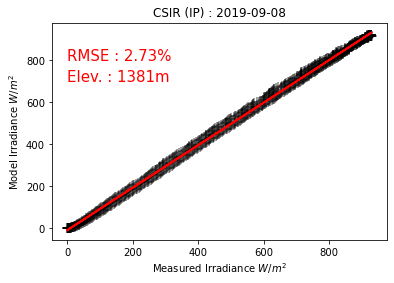

In [155]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (IP) : 2019-09-08')
plt.text(1, 800, 'RMSE : 2.73%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 6. Solis Simplified Model

In [156]:
# A_T = exl_1.iloc[1817: 2516,5]
# R_H = exl_1.iloc[1817: 2516,6]
# A_T.head()

In [157]:
# R_H.head()

In [158]:
# # Precipitable water (cm)
# p_w = np.mean(pvlib.atmosphere.gueymard94_pw(A_T, R_H))

In [159]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
apparent_elevation = solpos['apparent_elevation']
# y_dni = exl_1.iloc[413: 1046,4]


dg = pvlib.clearsky.simplified_solis(apparent_elevation, aod700= 0.0760, precipitable_water= 0.9, pressure=86800, dni_extra=1364)
df_out = dg['ghi']

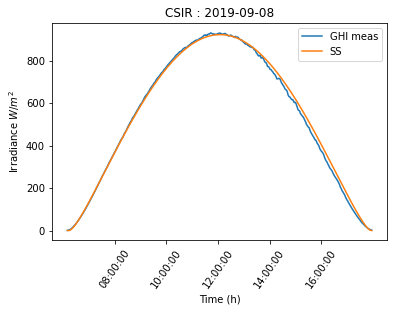

In [160]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'SS')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-08')
plt.legend()

In [161]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
15.56522209323975
Below is the mean absolute error
11.598052227492039
Below is the mean square error
242.27613881187887
Below is the RMSE percent
2.851053137341953
Below is the MAE percent
2.1243939207657334


In [162]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(3294    06:54:00
 3295    06:55:00
 3296    06:56:00
 3297    06:57:00
 3298    06:58:00
 3299    06:59:00
 3300    07:00:00
 3301    07:01:00
 3302    07:02:00
 3303    07:03:00
 3304    07:04:00
 3305    07:05:00
 3306    07:06:00
 3307    07:07:00
 3308    07:08:00
 3309    07:09:00
 3310    07:10:00
 3311    07:11:00
 3312    07:12:00
 3313    07:13:00
 3314    07:14:00
 3315    07:15:00
 3316    07:16:00
 3317    07:17:00
 3318    07:18:00
 3319    07:19:00
 3320    07:20:00
 3321    07:21:00
 3322    07:22:00
 3323    07:23:00
 3324    07:24:00
 3325    07:25:00
 3326    07:26:00
 3327    07:27:00
 3328    07:28:00
 3329    07:29:00
 3330    07:30:00
 3331    07:31:00
 3332    07:32:00
 3333    07:33:00
 3334    07:34:00
 3335    07:35:00
 3336    07:36:00
 3337    07:37:00
 3338    07:38:00
 3339    07:39:00
 3340    07:40:00
 3341    07:41:00
 3342    07:42:00
 3343    07:43:00
 3344    07:44:00
 3345    07:45:00
 3346    07:46:00
 3347    07:47:00
 3348    07:48:00
 3349    0

In [164]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
1.976435788426848 3.5484786452801393 7.491047864919161 7.979727759857116 6.805127513892593 3.1457466933992726 7.950871877484204 23.89778599733158 27.811924574673817 28.452520581152086
rmse hourly beginning from 7
2.1987641841330565 4.031515811751179 7.612356768577994 8.274688008733461 7.298231952183074 3.731667208123956 9.364688295082315 24.39842943077047 28.123990347189412 28.64278272955462
Below is the RMSE percent
0.402743596454709 0.7384453453014953 1.3943414053209457 1.515659401870765 1.3368037397524812 0.6835226274001369 1.715312751979289 4.469015498662628 5.1514196478284795 5.246445895479249
Below is the MAE percent
0.36202011263280515 0.6499683148633526 1.3721214762834897 1.4616320749291656 1.2464827056288557 0.5762006430601676 1.456346595963479 4.377313560646883 5.094259133544906 5.211595927269927


Text(1, 700, 'Elev. : 1381m')

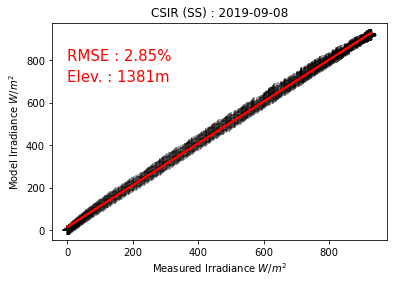

In [165]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'SS', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (SS) : 2019-09-08')
plt.text(1, 800, 'RMSE : 2.85%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 7. Bird - Hulstrom Model

In [166]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
zenith = solpos['zenith']

airmass_relative = airmass

bd = pvlib.clearsky.bird(zenith, airmass_relative, aod380 = 0.054, aod500 = 0.02, precipitable_water = 1.5
                         , ozone=0.3, pressure= 86800 , dni_extra=1364.0, asymmetry=0.85, albedo=0.25)
df_out = bd['ghi'].fillna(0)

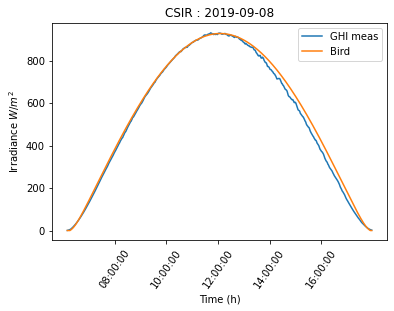

In [167]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'Bird')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-08')
plt.legend()

In [168]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
22.925328855208555
Below is the mean absolute error
16.61217606340498
Below is the mean square error
525.570703119458
Below is the RMSE percent
4.19919037233821
Below is the MAE percent
3.0428217727916587


In [169]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(3294    06:54:00
 3295    06:55:00
 3296    06:56:00
 3297    06:57:00
 3298    06:58:00
 3299    06:59:00
 3300    07:00:00
 3301    07:01:00
 3302    07:02:00
 3303    07:03:00
 3304    07:04:00
 3305    07:05:00
 3306    07:06:00
 3307    07:07:00
 3308    07:08:00
 3309    07:09:00
 3310    07:10:00
 3311    07:11:00
 3312    07:12:00
 3313    07:13:00
 3314    07:14:00
 3315    07:15:00
 3316    07:16:00
 3317    07:17:00
 3318    07:18:00
 3319    07:19:00
 3320    07:20:00
 3321    07:21:00
 3322    07:22:00
 3323    07:23:00
 3324    07:24:00
 3325    07:25:00
 3326    07:26:00
 3327    07:27:00
 3328    07:28:00
 3329    07:29:00
 3330    07:30:00
 3331    07:31:00
 3332    07:32:00
 3333    07:33:00
 3334    07:34:00
 3335    07:35:00
 3336    07:36:00
 3337    07:37:00
 3338    07:38:00
 3339    07:39:00
 3340    07:40:00
 3341    07:41:00
 3342    07:42:00
 3343    07:43:00
 3344    07:44:00
 3345    07:45:00
 3346    07:46:00
 3347    07:47:00
 3348    07:48:00
 3349    0

In [170]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
12.008179279225116 11.966277985346764 5.501253832468773 2.003617148057239 2.338181510284512 2.960988511092922 15.393666157588076 35.285147628138716 42.76074366508934 42.818978660222115
rmse hourly beginning from 7
12.046440272521854 12.143998846580494 5.915407021581128 2.2997882842224846 3.044028358445416 3.578002807891655 16.449947019683005 35.72938386683117 43.021204009341474 43.030440066142745
Below is the RMSE percent
2.206524335280288 2.2243939600744818 1.0835142374780713 0.4212479952857547 0.5575690825043212 0.6553762014927065 3.013106576869565 6.544485607633336 7.880114907986618 7.881806659544173
Below is the MAE percent
2.1995161394239715 2.1918411563973916 1.0076545586321275 0.36699887234386025 0.42828041197477595 0.5423588262098383 2.819629551758695 6.463115671858685 7.832406865198349 7.8430736622785195


Text(1, 700, 'Elev. : 1381m')

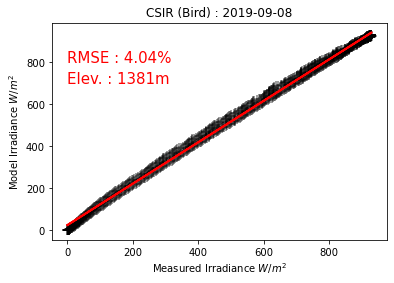

In [100]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'Bird', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (Bird) : 2019-09-08')
plt.text(1, 800, 'RMSE : 4.04%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# Day 4

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pvlib
from pvlib import atmosphere, tools

naive_times = pd.date_range(start = '2019-09-14 06:04', end = '2019-09-14 17:59', freq = '1min')
coordinates = [(-25.750233, 28.278718, 'South Africa-Pretoria', 1381, 'Etc/GMT-2')]


sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
# inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = {'module': module,'surface_azimuth': 180}

for latitude, longitude, name, altitude, timezone in coordinates:

	times = naive_times.tz_localize(timezone)
	system['surface_tilt'] = latitude

	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

exl_1 = pd.read_csv('csir_1.csv')
x = exl_1.iloc[4684:5400,1]
y = exl_1.iloc[4684:5400,2]
c = exl_1.iloc[4684:5400,1]
c1 = exl_1.iloc[4684:5400,0]

apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1210.0 * cos_zenith[cos_zen_gte_0] * np.exp(-0.089/cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])


import ephem
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
sunset.head()

,sunrise,sunset,transit
2019-09-14 06:04:00+02:00,2019-09-14 06:05:31.726522+02:00,2019-09-14 17:59:58.043118+02:00,2019-09-14 12:02:33.857182+02:00
2019-09-14 06:05:00+02:00,2019-09-14 06:05:31.726524+02:00,2019-09-14 17:59:58.043118+02:00,2019-09-14 12:02:33.857182+02:00
2019-09-14 06:06:00+02:00,2019-09-15 06:04:25.824264+02:00,2019-09-14 17:59:58.043118+02:00,2019-09-14 12:02:33.857182+02:00
2019-09-14 06:07:00+02:00,2019-09-15 06:04:25.824264+02:00,2019-09-14 17:59:58.043118+02:00,2019-09-14 12:02:33.857182+02:00
2019-09-14 06:08:00+02:00,2019-09-15 06:04:25.824264+02:00,2019-09-14 17:59:58.043118+02:00,2019-09-14 12:02:33.857182+02:00


In [172]:
x

4684    06:04:00
4685    06:05:00
4686    06:06:00
4687    06:07:00
4688    06:08:00
          ...   
5395    17:55:00
5396    17:56:00
5397    17:57:00
5398    17:58:00
5399    17:59:00
Name: TMESTAMP, Length: 716, dtype: object

# 1. Haurwitz model

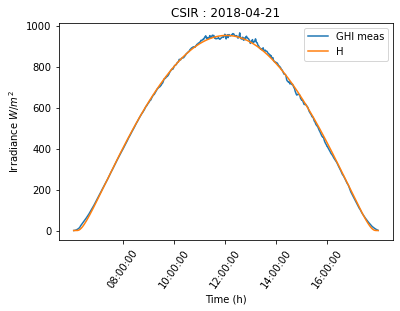

In [173]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'H')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2018-04-21')
plt.legend()

In [174]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
8.146710539605746
Below is the mean absolute error
6.415034472245166
Below is the mean square error
66.36889261612335
Below is the RMSE percent
1.4235534088656436
Below is the MAE percent
1.1209609260766942


In [175]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(4728    06:48:00
 4729    06:49:00
 4730    06:50:00
 4731    06:51:00
 4732    06:52:00
 4733    06:53:00
 4734    06:54:00
 4735    06:55:00
 4736    06:56:00
 4737    06:57:00
 4738    06:58:00
 4739    06:59:00
 4740    07:00:00
 4741    07:01:00
 4742    07:02:00
 4743    07:03:00
 4744    07:04:00
 4745    07:05:00
 4746    07:06:00
 4747    07:07:00
 4748    07:08:00
 4749    07:09:00
 4750    07:10:00
 4751    07:11:00
 4752    07:12:00
 4753    07:13:00
 4754    07:14:00
 4755    07:15:00
 4756    07:16:00
 4757    07:17:00
 4758    07:18:00
 4759    07:19:00
 4760    07:20:00
 4761    07:21:00
 4762    07:22:00
 4763    07:23:00
 4764    07:24:00
 4765    07:25:00
 4766    07:26:00
 4767    07:27:00
 4768    07:28:00
 4769    07:29:00
 4770    07:30:00
 4771    07:31:00
 4772    07:32:00
 4773    07:33:00
 4774    07:34:00
 4775    07:35:00
 4776    07:36:00
 4777    07:37:00
 4778    07:38:00
 4779    07:39:00
 4780    07:40:00
 4781    07:41:00
 4782    07:42:00
 4783    0

In [177]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
3.2480921053573764 3.2814716988766355 4.4576179019528075 2.73121400524435 8.394501326122462 5.7621240808528595 10.101459464038653 6.987297252283741 8.17193342930624 9.351738259393853
rmse hourly beginning from 7
3.8400818712113094 3.5048483697286628 5.208913263985546 3.567798923492777 9.679882005321893 7.474123422359797 11.881654242449187 9.048883805068865 9.567038611694876 10.848554870436818
Below is the RMSE percent
0.6710145906755844 0.6124360034677122 0.9102037193273032 0.6234359616674326 1.6914592655651233 1.3060257664067867 2.0761961920178926 1.5811988562144612 1.6717410496195888 1.8956727616621187
Below is the MAE percent
0.5675705017886699 0.5734032405253515 0.7789226251375481 0.47725139964225866 1.4668522860156894 1.006871587952831 1.7651255662811671 1.2209579282201222 1.4279608479712829 1.63411953981412


Text(1, 700, 'Elev. : 1381m')

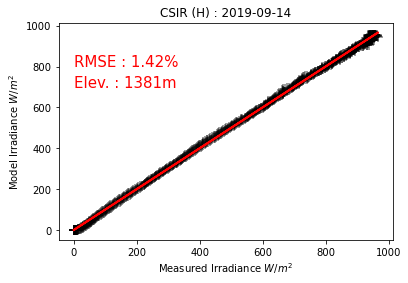

In [178]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (H) : 2019-09-14')
plt.text(1, 800, 'RMSE : 1.42%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

In [179]:
#sns.regplot(x=y, y=df_out, color='black', marker='+')

# 2. ABCG MODEL

In [180]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1139 * (cos_zenith[cos_zen_gte_0] **1.25))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (939.39 * (cos_zenith[cos_zen_gte_0] **1.15))
# ABCG_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

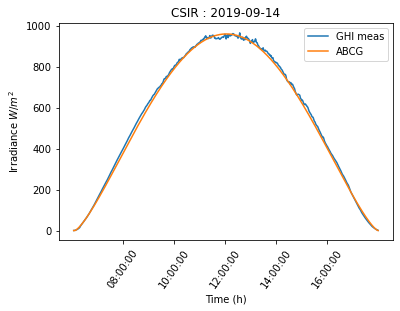

In [181]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'ABCG')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-14')
plt.legend()

In [183]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
13.559860944060661
Below is the mean absolute error
11.440677813702356
Below is the mean square error
183.86982882226167
Below is the RMSE percent
2.3694454561528864
Below is the MAE percent
1.9991401219243148


In [184]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(4728    06:48:00
 4729    06:49:00
 4730    06:50:00
 4731    06:51:00
 4732    06:52:00
 4733    06:53:00
 4734    06:54:00
 4735    06:55:00
 4736    06:56:00
 4737    06:57:00
 4738    06:58:00
 4739    06:59:00
 4740    07:00:00
 4741    07:01:00
 4742    07:02:00
 4743    07:03:00
 4744    07:04:00
 4745    07:05:00
 4746    07:06:00
 4747    07:07:00
 4748    07:08:00
 4749    07:09:00
 4750    07:10:00
 4751    07:11:00
 4752    07:12:00
 4753    07:13:00
 4754    07:14:00
 4755    07:15:00
 4756    07:16:00
 4757    07:17:00
 4758    07:18:00
 4759    07:19:00
 4760    07:20:00
 4761    07:21:00
 4762    07:22:00
 4763    07:23:00
 4764    07:24:00
 4765    07:25:00
 4766    07:26:00
 4767    07:27:00
 4768    07:28:00
 4769    07:29:00
 4770    07:30:00
 4771    07:31:00
 4772    07:32:00
 4773    07:33:00
 4774    07:34:00
 4775    07:35:00
 4776    07:36:00
 4777    07:37:00
 4778    07:38:00
 4779    07:39:00
 4780    07:40:00
 4781    07:41:00
 4782    07:42:00
 4783    0

In [185]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
12.426715894525632 23.153171587953842 16.454820731370262 7.369921098938092 7.75662438525674 8.339722979840577 11.028420446263349 11.72553403545934 17.483015275960327 13.041441629824435
rmse hourly beginning from 7
13.450933343874873 23.22307281060234 17.30404833958589 8.202627567944596 9.781129682200989 10.409061769580626 12.844969140125125 12.942954299250868 18.365880424297153 13.33054045433729
Below is the RMSE percent
2.3504114846118354 4.057991787378257 3.023703478997731 1.4333243312420338 1.70915124993848 1.8188758877760065 2.2445255072342403 2.2616474003730196 3.2092476537275214 2.3293740723371257
Below is the MAE percent
2.1714400783795296 4.045777271678776 2.875309737658705 1.2878174881087503 1.3553898878868205 1.4572803365518538 1.9271024107653543 2.0489158005307093 3.0549761001509554 2.2788570427785615


Text(1, 700, 'Elev. : 1381m')

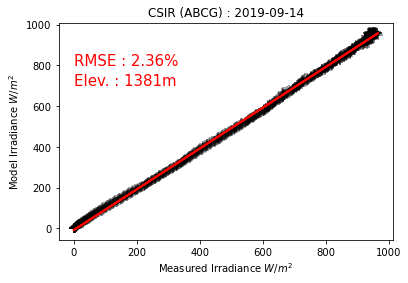

In [186]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (ABCG) : 2019-09-14')
plt.text(1, 800, 'RMSE : 2.36%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 3. Berger Duffie Model

In [187]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1210.0 * (0.90*cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (1390* (0.70*cos_zenith[cos_zen_gte_0]))
# BD_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

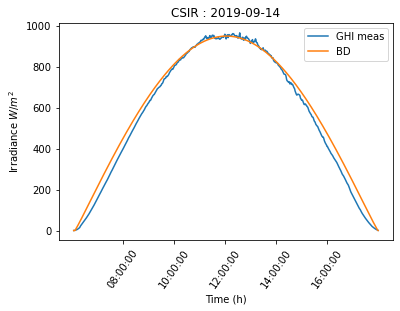

In [188]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'BD')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-14')
plt.legend()

In [189]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
37.214593123037375
Below is the mean absolute error
30.101105385495053
Below is the mean square error
1384.9259413132206
Below is the RMSE percent
6.50286525368699
Below is the MAE percent
5.259856843301958


In [190]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(4728    06:48:00
 4729    06:49:00
 4730    06:50:00
 4731    06:51:00
 4732    06:52:00
 4733    06:53:00
 4734    06:54:00
 4735    06:55:00
 4736    06:56:00
 4737    06:57:00
 4738    06:58:00
 4739    06:59:00
 4740    07:00:00
 4741    07:01:00
 4742    07:02:00
 4743    07:03:00
 4744    07:04:00
 4745    07:05:00
 4746    07:06:00
 4747    07:07:00
 4748    07:08:00
 4749    07:09:00
 4750    07:10:00
 4751    07:11:00
 4752    07:12:00
 4753    07:13:00
 4754    07:14:00
 4755    07:15:00
 4756    07:16:00
 4757    07:17:00
 4758    07:18:00
 4759    07:19:00
 4760    07:20:00
 4761    07:21:00
 4762    07:22:00
 4763    07:23:00
 4764    07:24:00
 4765    07:25:00
 4766    07:26:00
 4767    07:27:00
 4768    07:28:00
 4769    07:29:00
 4770    07:30:00
 4771    07:31:00
 4772    07:32:00
 4773    07:33:00
 4774    07:34:00
 4775    07:35:00
 4776    07:36:00
 4777    07:37:00
 4778    07:38:00
 4779    07:39:00
 4780    07:40:00
 4781    07:41:00
 4782    07:42:00
 4783    0

In [192]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
57.3725380832222 44.40351756964923 26.842153036755754 8.550719522566663 8.305183968048217 6.086536935820299 8.15341846442503 16.972318198874305 38.900044576669224 59.70649398196732
rmse hourly beginning from 7
57.39314391359499 44.9137688824663 27.192811971933654 9.941135126546234 9.740757952836216 7.668035570476746 10.376372951913877 20.718898694413255 39.74688522167651 59.76615476236744
Below is the RMSE percent
10.028858306246946 7.84821658837688 4.751662648512611 1.7371105464701764 1.7020967077794547 1.3399099087401047 1.8131638549751532 3.6204132601722816 6.945357107513889 10.443517409037243
Below is the MAE percent
10.02525765050656 7.75905544877242 4.690388626305133 1.494149800146558 1.4512450014633136 1.0635593790954734 1.4247255493506263 2.965737067850845 6.797380463308185 10.433092304708167


Text(1, 700, 'Elev. : 1381m')

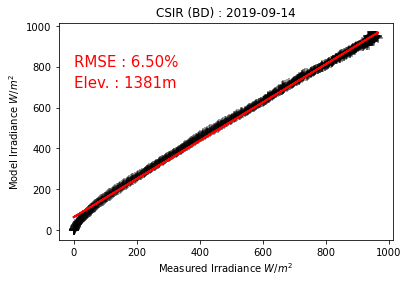

In [193]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'BD', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (BD) : 2019-09-14')
plt.text(1, 800, 'RMSE : 6.50%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 4. Kasten Czeplak Model

In [154]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = ((1155.0 * cos_zenith[cos_zen_gte_0]) - 50)

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

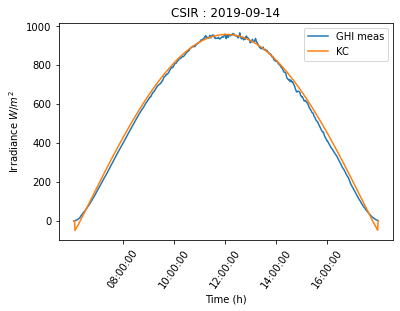

In [155]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'KC')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-14')
plt.legend()

In [156]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
21.155064161886155
Below is the mean absolute error
17.803922165697717
Below is the mean square error
447.53673969351996
Below is the RMSE percent
3.6966286645409476
Below is the MAE percent
3.11105126013034


In [157]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(4728    06:48:00
 4729    06:49:00
 4730    06:50:00
 4731    06:51:00
 4732    06:52:00
 4733    06:53:00
 4734    06:54:00
 4735    06:55:00
 4736    06:56:00
 4737    06:57:00
 4738    06:58:00
 4739    06:59:00
 4740    07:00:00
 4741    07:01:00
 4742    07:02:00
 4743    07:03:00
 4744    07:04:00
 4745    07:05:00
 4746    07:06:00
 4747    07:07:00
 4748    07:08:00
 4749    07:09:00
 4750    07:10:00
 4751    07:11:00
 4752    07:12:00
 4753    07:13:00
 4754    07:14:00
 4755    07:15:00
 4756    07:16:00
 4757    07:17:00
 4758    07:18:00
 4759    07:19:00
 4760    07:20:00
 4761    07:21:00
 4762    07:22:00
 4763    07:23:00
 4764    07:24:00
 4765    07:25:00
 4766    07:26:00
 4767    07:27:00
 4768    07:28:00
 4769    07:29:00
 4770    07:30:00
 4771    07:31:00
 4772    07:32:00
 4773    07:33:00
 4774    07:34:00
 4775    07:35:00
 4776    07:36:00
 4777    07:37:00
 4778    07:38:00
 4779    07:39:00
 4780    07:40:00
 4781    07:41:00
 4782    07:42:00
 4783    0

In [158]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
24.664747967053845 25.41449469011479 19.488732207388715 9.027422052195222 6.733924693719332 6.972508273000071 5.5815517911115835 14.425179891353336 26.335190149621823 34.345108719076094
rmse hourly beginning from 7
25.01676459120464 25.596566831309943 19.63860014294195 10.10100273885474 8.58925246277952 9.026821084886324 7.500530721338931 17.467308369785755 27.00573895089936 34.60706335193193
Below is the RMSE percent
4.3714208746542935 4.472735319466983 3.4316422613669135 1.765045758278991 1.500883032919093 1.5773436240478074 1.3106401687840312 3.052231480746738 4.718973572902831 6.047226394747558
Below is the MAE percent
4.309909610340797 4.440920095887138 3.4054543896487184 1.5774486368694902 1.176683694134615 1.218373707046366 0.9753184479022325 2.520650992569813 4.6018021050780265 6.001452531940335


Text(1, 700, 'Elev. : 1381m')

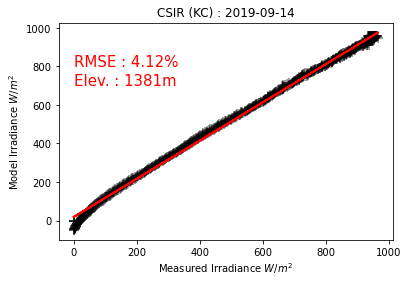

In [159]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (KC) : 2019-09-14')
plt.text(1, 800, 'RMSE : 4.12%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 5. Ineichen - Perez Model

In [201]:
tl = 3.0

linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

relative_airmass = pvlib.atmosphere.get_relative_airmass(apparent_zenith, model='kastenyoung1989')

cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl, dni_extra=dni_extra, altitude=altitude)


df_out = cs['ghi']


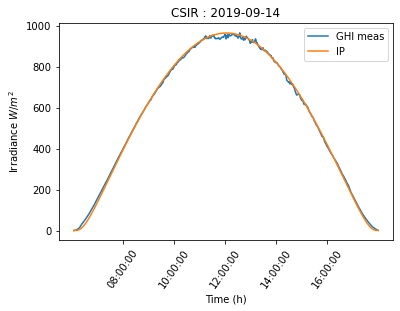

In [202]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'IP')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-14')
plt.legend()

In [203]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
9.952603297692121
Below is the mean absolute error
8.044423892568618
Below is the mean square error
99.05431240123208
Below is the RMSE percent
1.7391144907675484
Below is the MAE percent
1.4056798752027935


In [204]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(4728    06:48:00
 4729    06:49:00
 4730    06:50:00
 4731    06:51:00
 4732    06:52:00
 4733    06:53:00
 4734    06:54:00
 4735    06:55:00
 4736    06:56:00
 4737    06:57:00
 4738    06:58:00
 4739    06:59:00
 4740    07:00:00
 4741    07:01:00
 4742    07:02:00
 4743    07:03:00
 4744    07:04:00
 4745    07:05:00
 4746    07:06:00
 4747    07:07:00
 4748    07:08:00
 4749    07:09:00
 4750    07:10:00
 4751    07:11:00
 4752    07:12:00
 4753    07:13:00
 4754    07:14:00
 4755    07:15:00
 4756    07:16:00
 4757    07:17:00
 4758    07:18:00
 4759    07:19:00
 4760    07:20:00
 4761    07:21:00
 4762    07:22:00
 4763    07:23:00
 4764    07:24:00
 4765    07:25:00
 4766    07:26:00
 4767    07:27:00
 4768    07:28:00
 4769    07:29:00
 4770    07:30:00
 4771    07:31:00
 4772    07:32:00
 4773    07:33:00
 4774    07:34:00
 4775    07:35:00
 4776    07:36:00
 4777    07:37:00
 4778    07:38:00
 4779    07:39:00
 4780    07:40:00
 4781    07:41:00
 4782    07:42:00
 4783    0

In [206]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
13.861253846623613 3.959333540040683 5.119085291119207 6.867706461794576 8.20472887698964 12.460467243115835 5.283726309012115 7.308259587884207 5.688201200670295 6.649253638208873
rmse hourly beginning from 7
14.373317327825722 4.265802736636202 6.4917933456922405 7.4804051152074225 11.097615358216329 14.229743211086182 6.808934916533676 9.896292870999211 7.35175180050567 7.26711163494439
Below is the RMSE percent
2.511588545985597 0.745404908860397 1.134373745327488 1.3071234272630563 1.9391935059758625 2.4865004540108284 1.1897909547728822 1.7292748260975366 1.2846425911249397 1.2698525975900101
Below is the MAE percent
2.4221107486983318 0.6918525864346908 0.8945072101210788 1.200060674458357 1.4336915132647177 2.1773377774699556 0.923276525186482 1.277042776790627 0.9939543291935492 1.1618883029005478


Text(1, 700, 'Elev. : 1381m')

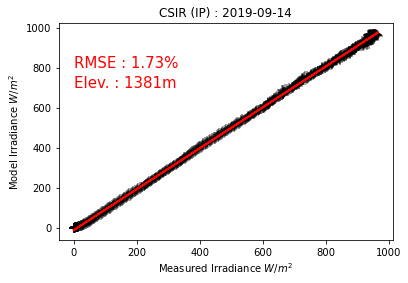

In [207]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (IP) : 2019-09-14')
plt.text(1, 800, 'RMSE : 1.73%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 6. Solis Simplified Model

In [208]:
# A_T = exl_1.iloc[1817: 2516,5]
# R_H = exl_1.iloc[1817: 2516,6]
# A_T.head()

In [209]:
# R_H.head()

In [210]:
# # Precipitable water (cm)
# p_w = np.mean(pvlib.atmosphere.gueymard94_pw(A_T, R_H))

In [211]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
apparent_elevation = solpos['apparent_elevation']
# y_dni = exl_1.iloc[413: 1046,4]


dg = pvlib.clearsky.simplified_solis(apparent_elevation, aod700= 0.0760, precipitable_water= 0.5, pressure=86800, dni_extra=1364)
df_out = dg['ghi']

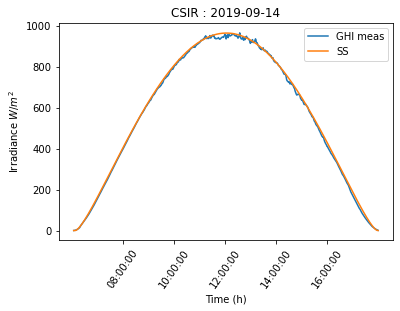

In [212]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'SS')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-14')
plt.legend()

In [213]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
9.8320121785943
Below is the mean absolute error
8.043155891519685
Below is the mean square error
96.66846348002666
Below is the RMSE percent
1.7180424399273901
Below is the MAE percent
1.4054583051338831


In [214]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(4728    06:48:00
 4729    06:49:00
 4730    06:50:00
 4731    06:51:00
 4732    06:52:00
 4733    06:53:00
 4734    06:54:00
 4735    06:55:00
 4736    06:56:00
 4737    06:57:00
 4738    06:58:00
 4739    06:59:00
 4740    07:00:00
 4741    07:01:00
 4742    07:02:00
 4743    07:03:00
 4744    07:04:00
 4745    07:05:00
 4746    07:06:00
 4747    07:07:00
 4748    07:08:00
 4749    07:09:00
 4750    07:10:00
 4751    07:11:00
 4752    07:12:00
 4753    07:13:00
 4754    07:14:00
 4755    07:15:00
 4756    07:16:00
 4757    07:17:00
 4758    07:18:00
 4759    07:19:00
 4760    07:20:00
 4761    07:21:00
 4762    07:22:00
 4763    07:23:00
 4764    07:24:00
 4765    07:25:00
 4766    07:26:00
 4767    07:27:00
 4768    07:28:00
 4769    07:29:00
 4770    07:30:00
 4771    07:31:00
 4772    07:32:00
 4773    07:33:00
 4774    07:34:00
 4775    07:35:00
 4776    07:36:00
 4777    07:37:00
 4778    07:38:00
 4779    07:39:00
 4780    07:40:00
 4781    07:41:00
 4782    07:42:00
 4783    0

In [215]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
6.859311727800266 4.401233579487703 6.939520789386868 6.882988866754889 8.093183125663458 12.293602664174797 5.302062240179453 7.88337698046511 9.189216852639793 12.48572555593987
rmse hourly beginning from 7
6.890375264112067 4.673974708877367 7.719581438976849 7.505640531685879 10.990455518291345 14.085256200128823 6.8226269855749955 10.567743975000917 10.596806898115522 13.07258175920686
Below is the RMSE percent
1.204021813209646 0.8167287394620233 1.3489170161437036 1.311533055293585 1.9204684322572017 2.461252843213169 1.1921835022266594 1.8466039619912598 1.8516824072201974 2.284298458319148
Below is the MAE percent
1.198593781515982 0.7690700479456175 1.212609485460343 1.2027311166658168 1.4142000468902969 2.1481799181087293 0.9264805395173081 1.3775385929517945 1.6057206048730022 2.181751406400067


Text(1, 700, 'Elev. : 1381m')

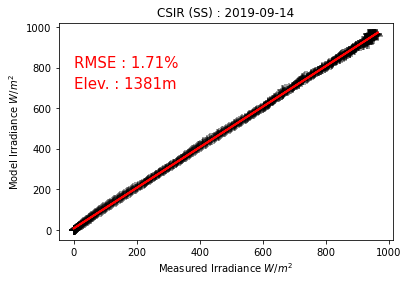

In [129]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'SS', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (SS) : 2019-09-14')
plt.text(1, 800, 'RMSE : 1.71%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 7. Bird - Hulstrom Model

In [216]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
zenith = solpos['zenith']

airmass_relative = airmass

bd = pvlib.clearsky.bird(zenith, airmass_relative, aod380 = 0.054, aod500 = 0.02, precipitable_water = 1.5
                         , ozone=0.3, pressure= 86800 , dni_extra=1364.0, asymmetry=0.85, albedo=0.25)
df_out = bd['ghi'].fillna(0)

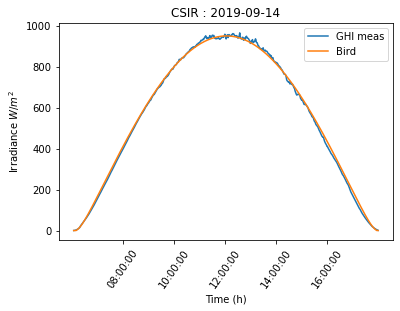

In [217]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'Bird')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-14')
plt.legend()

In [218]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
11.419492056127968
Below is the mean absolute error
9.435258673314468
Below is the mean square error
130.40479881996978
Below is the RMSE percent
1.9954381299033879
Below is the MAE percent
1.648713868330954


In [219]:
a = 44
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(4728    06:48:00
 4729    06:49:00
 4730    06:50:00
 4731    06:51:00
 4732    06:52:00
 4733    06:53:00
 4734    06:54:00
 4735    06:55:00
 4736    06:56:00
 4737    06:57:00
 4738    06:58:00
 4739    06:59:00
 4740    07:00:00
 4741    07:01:00
 4742    07:02:00
 4743    07:03:00
 4744    07:04:00
 4745    07:05:00
 4746    07:06:00
 4747    07:07:00
 4748    07:08:00
 4749    07:09:00
 4750    07:10:00
 4751    07:11:00
 4752    07:12:00
 4753    07:13:00
 4754    07:14:00
 4755    07:15:00
 4756    07:16:00
 4757    07:17:00
 4758    07:18:00
 4759    07:19:00
 4760    07:20:00
 4761    07:21:00
 4762    07:22:00
 4763    07:23:00
 4764    07:24:00
 4765    07:25:00
 4766    07:26:00
 4767    07:27:00
 4768    07:28:00
 4769    07:29:00
 4770    07:30:00
 4771    07:31:00
 4772    07:32:00
 4773    07:33:00
 4774    07:34:00
 4775    07:35:00
 4776    07:36:00
 4777    07:37:00
 4778    07:38:00
 4779    07:39:00
 4780    07:40:00
 4781    07:41:00
 4782    07:42:00
 4783    0

In [220]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
12.326086872198768 9.029124299480229 5.41115204920356 3.12877219660875 9.573696629399585 6.091930814079539 11.89702017912183 7.4923595947350385 10.781693475170249 18.582772271452377
rmse hourly beginning from 7
12.388085459703055 9.477233043796861 5.902384247368748 4.05383541922467 10.833673469769534 7.67375244596023 13.559445632048403 9.41987678374989 12.212028781331629 18.918072684931822
Below is the RMSE percent
2.164689809432291 1.656048455449854 1.0313806014007814 0.7083658124297174 1.8930723908074507 1.340908873603654 2.3693728846741378 1.646026042217826 2.1339257257655437 3.3057375401858846
Below is the MAE percent
2.1538561974906973 1.5777460869769322 0.9455428553751986 0.5467205818094503 1.6729044693524673 1.064501903534708 2.078881230528149 1.3092123489204566 1.8839894243579995 3.2471472607986134


Text(1, 700, 'Elev. : 1381m')

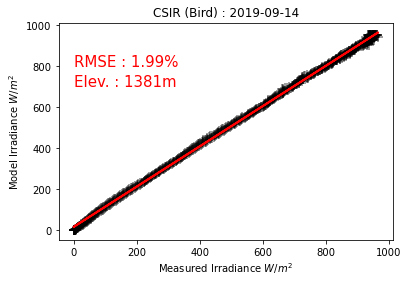

In [133]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'Bird', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (Bird) : 2019-09-14')
plt.text(1, 800, 'RMSE : 1.99%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# Day 5

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pvlib
from pvlib import atmosphere, tools

naive_times = pd.date_range(start = '2019-08-03 06:44', end = '2019-08-03 17:42', freq = '1min')
coordinates = [(-25.750233, 28.278718, 'South Africa-Pretoria', 1381, 'Etc/GMT-2')]


sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
# inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = {'module': module,'surface_azimuth': 180}

for latitude, longitude, name, altitude, timezone in coordinates:

	times = naive_times.tz_localize(timezone)
	system['surface_tilt'] = latitude

	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

exl_1 = pd.read_csv('csir_1.csv')
x = exl_1.iloc[6164:6823,1]
y = exl_1.iloc[6164:6823,2]
c = exl_1.iloc[6164:6823,1]
c1 = exl_1.iloc[6164:6823,0]

apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1130.0 * cos_zenith[cos_zen_gte_0] * np.exp(-0.089/cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])


import ephem
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
sunset.head()

,sunrise,sunset,transit
2019-08-03 06:44:00+02:00,2019-08-03 06:44:06.722168+02:00,2019-08-03 17:42:22.248881+02:00,2019-08-03 12:13:06.920896+02:00
2019-08-03 06:45:00+02:00,2019-08-04 06:43:28.529170+02:00,2019-08-03 17:42:22.248881+02:00,2019-08-03 12:13:06.920896+02:00
2019-08-03 06:46:00+02:00,2019-08-04 06:43:28.529170+02:00,2019-08-03 17:42:22.248881+02:00,2019-08-03 12:13:06.920896+02:00
2019-08-03 06:47:00+02:00,2019-08-04 06:43:28.529170+02:00,2019-08-03 17:42:22.248881+02:00,2019-08-03 12:13:06.920896+02:00
2019-08-03 06:48:00+02:00,2019-08-04 06:43:28.529170+02:00,2019-08-03 17:42:22.248881+02:00,2019-08-03 12:13:06.920896+02:00


In [161]:
x

6164    06:44:00
6165    06:45:00
6166    06:46:00
6167    06:47:00
6168    06:48:00
          ...   
6818    17:38:00
6819    17:39:00
6820    17:40:00
6821    17:41:00
6822    17:42:00
Name: TMESTAMP, Length: 659, dtype: object

# 1. Haurwitz model

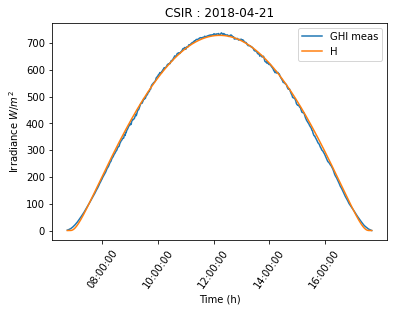

In [229]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'H')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2018-04-21')
plt.legend()

In [230]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
7.730517886663196
Below is the mean absolute error
6.552174798436684
Below is the mean square error
59.76090679601961
Below is the RMSE percent
1.7779901121418413
Below is the MAE percent
1.5069756225185928


In [231]:
a = 14
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(6178    06:58:00
 6179    06:59:00
 6180    07:00:00
 6181    07:01:00
 6182    07:02:00
 6183    07:03:00
 6184    07:04:00
 6185    07:05:00
 6186    07:06:00
 6187    07:07:00
 6188    07:08:00
 6189    07:09:00
 6190    07:10:00
 6191    07:11:00
 6192    07:12:00
 6193    07:13:00
 6194    07:14:00
 6195    07:15:00
 6196    07:16:00
 6197    07:17:00
 6198    07:18:00
 6199    07:19:00
 6200    07:20:00
 6201    07:21:00
 6202    07:22:00
 6203    07:23:00
 6204    07:24:00
 6205    07:25:00
 6206    07:26:00
 6207    07:27:00
 6208    07:28:00
 6209    07:29:00
 6210    07:30:00
 6211    07:31:00
 6212    07:32:00
 6213    07:33:00
 6214    07:34:00
 6215    07:35:00
 6216    07:36:00
 6217    07:37:00
 6218    07:38:00
 6219    07:39:00
 6220    07:40:00
 6221    07:41:00
 6222    07:42:00
 6223    07:43:00
 6224    07:44:00
 6225    07:45:00
 6226    07:46:00
 6227    07:47:00
 6228    07:48:00
 6229    07:49:00
 6230    07:50:00
 6231    07:51:00
 6232    07:52:00
 6233    0

In [232]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
6.379282282492669 10.151405707131856 6.932104024178281 4.412480752819677 4.347785521883929 3.878909132581129 3.6530681103675504 4.5716132769451585 12.009493467842477 10.000040519772071
rmse hourly beginning from 7
7.306165970488953 10.370058812978584 8.207186646905402 5.042200819705479 4.652463217851618 4.448048471323867 4.503632117226469 5.398890885215098 12.705878141944302 10.321873359672782
Below is the RMSE percent
1.6803907634193052 2.3850746226995425 1.8876221387282743 1.1596872722248468 1.070049085937027 1.023034461117473 1.035818491147611 1.2417246491345422 2.9223043053079696 2.3739921492116287
Below is the MAE percent
1.4672109924745804 2.334785228653215 1.5943579190976702 1.014854019297269 0.9999743588925063 0.8921345483882986 0.840191960543764 1.0514539028449683 2.7621384428194724 2.299971803421706


Text(1, 600, 'Elev. : 1381m')

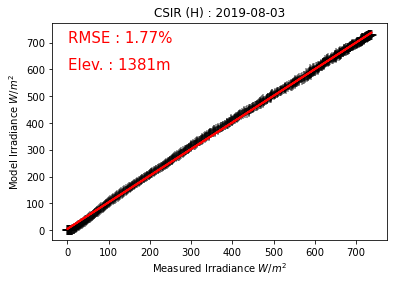

In [138]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (H) : 2019-08-03')
plt.text(1, 700, 'RMSE : 1.77%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

In [139]:
#sns.regplot(x=y, y=df_out, color='black', marker='+')

# 2. ABCG MODEL

In [233]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1090 * (cos_zenith[cos_zen_gte_0] **1.25))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (939.39 * (cos_zenith[cos_zen_gte_0] **1.15))
# ABCG_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

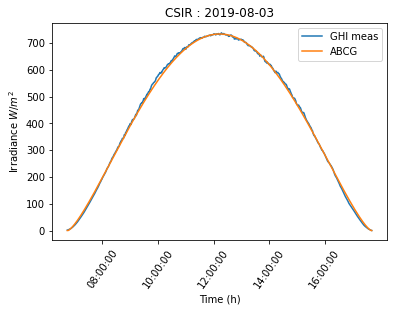

In [234]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'ABCG')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-03')
plt.legend()

In [235]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
6.5323990963606695
Below is the mean absolute error
5.110405744946273
Below is the mean square error
42.67223795413369
Below is the RMSE percent
1.5024272852315819
Below is the MAE percent
1.1753741491528102


In [236]:
a = 14
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(6178    06:58:00
 6179    06:59:00
 6180    07:00:00
 6181    07:01:00
 6182    07:02:00
 6183    07:03:00
 6184    07:04:00
 6185    07:05:00
 6186    07:06:00
 6187    07:07:00
 6188    07:08:00
 6189    07:09:00
 6190    07:10:00
 6191    07:11:00
 6192    07:12:00
 6193    07:13:00
 6194    07:14:00
 6195    07:15:00
 6196    07:16:00
 6197    07:17:00
 6198    07:18:00
 6199    07:19:00
 6200    07:20:00
 6201    07:21:00
 6202    07:22:00
 6203    07:23:00
 6204    07:24:00
 6205    07:25:00
 6206    07:26:00
 6207    07:27:00
 6208    07:28:00
 6209    07:29:00
 6210    07:30:00
 6211    07:31:00
 6212    07:32:00
 6213    07:33:00
 6214    07:34:00
 6215    07:35:00
 6216    07:36:00
 6217    07:37:00
 6218    07:38:00
 6219    07:39:00
 6220    07:40:00
 6221    07:41:00
 6222    07:42:00
 6223    07:43:00
 6224    07:44:00
 6225    07:45:00
 6226    07:46:00
 6227    07:47:00
 6228    07:48:00
 6229    07:49:00
 6230    07:50:00
 6231    07:51:00
 6232    07:52:00
 6233    0

In [237]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
6.075691953621339 2.903497366696534 8.629831560407187 9.914863166163743 2.2875746995140855 2.15882945303424 2.30519971115246 6.043652282085528 4.148960942288191 6.226892253135878
rmse hourly beginning from 7
6.214826166676759 3.412757354617632 9.795758819873832 10.825311541582433 2.8571767040882214 2.813181182857502 2.9855339815515904 7.087149225052951 5.181360251831824 7.739827824656322
Below is the RMSE percent
1.4293867028100553 0.784921388270486 2.252987778827802 2.489781042353481 0.6571399229636374 0.6470211181340545 0.6866616152353857 1.6300177336316741 1.1916934195437445 1.7801313629531215
Below is the MAE percent
1.3973863557828587 0.6677935015870726 1.984828883240132 2.2803813316429276 0.5261335988289775 0.49652267513894305 0.530187285383856 1.39001735152957 0.9542454514952596 1.4321618574285542


Text(1, 600, 'Elev. : 1381m')

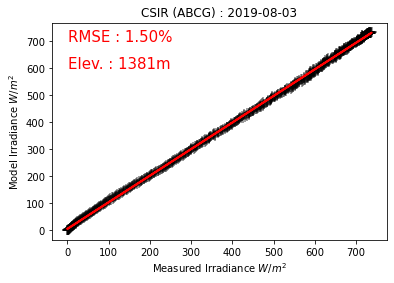

In [143]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (ABCG) : 2019-08-03')
plt.text(1, 700, 'RMSE : 1.50%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 3. Berger Duffie Model

In [242]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1110.0 * (0.90*cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (1390* (0.70*cos_zenith[cos_zen_gte_0]))
# BD_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

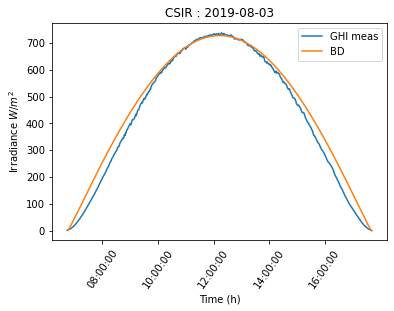

In [243]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'BD')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-03')
plt.legend()

In [244]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
36.14305378287956
Below is the mean absolute error
28.445434527347878
Below is the mean square error
1306.3203367521246
Below is the RMSE percent
8.312766775876216
Below is the MAE percent
6.542343225472205


In [245]:
a = 14
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(6178    06:58:00
 6179    06:59:00
 6180    07:00:00
 6181    07:01:00
 6182    07:02:00
 6183    07:03:00
 6184    07:04:00
 6185    07:05:00
 6186    07:06:00
 6187    07:07:00
 6188    07:08:00
 6189    07:09:00
 6190    07:10:00
 6191    07:11:00
 6192    07:12:00
 6193    07:13:00
 6194    07:14:00
 6195    07:15:00
 6196    07:16:00
 6197    07:17:00
 6198    07:18:00
 6199    07:19:00
 6200    07:20:00
 6201    07:21:00
 6202    07:22:00
 6203    07:23:00
 6204    07:24:00
 6205    07:25:00
 6206    07:26:00
 6207    07:27:00
 6208    07:28:00
 6209    07:29:00
 6210    07:30:00
 6211    07:31:00
 6212    07:32:00
 6213    07:33:00
 6214    07:34:00
 6215    07:35:00
 6216    07:36:00
 6217    07:37:00
 6218    07:38:00
 6219    07:39:00
 6220    07:40:00
 6221    07:41:00
 6222    07:42:00
 6223    07:43:00
 6224    07:44:00
 6225    07:45:00
 6226    07:46:00
 6227    07:47:00
 6228    07:48:00
 6229    07:49:00
 6230    07:50:00
 6231    07:51:00
 6232    07:52:00
 6233    0

In [247]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
50.45892302242306 53.6435925352164 30.658082578092213 6.401695112943845 3.4268670049533867 4.288162948989439 7.605228015471856 20.794028309193866 45.55077701111396 60.899017542227995
rmse hourly beginning from 7
51.60599521891014 53.8557076642087 32.53660255156112 7.29794009970817 3.860357968780502 4.897917232250309 9.234081959519003 21.671638517168198 46.41216750163189 61.00650873735523
Below is the RMSE percent
11.869185295432585 12.386610717835925 7.483296522625986 1.6784988439998803 0.8878678503106521 1.1265025884040873 2.123804208131632 4.984395555686281 10.674624405609071 14.031268137733017
Below is the MAE percent
11.605362993593609 12.337825033938259 7.051243976178759 1.4723658593944347 0.7881665549139821 0.9862613908066621 1.7491739118049867 4.7825485002923465 10.47650782438026 14.006545566117437


Text(1, 700, 'Elev. : 1381m')

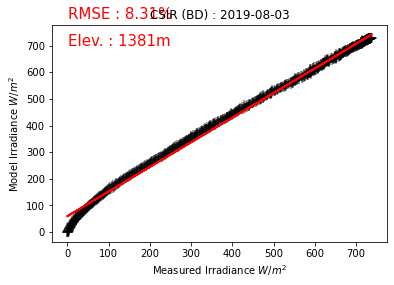

In [248]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'BD', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (BD) : 2019-08-03')
plt.text(1, 800, 'RMSE : 8.31%', fontsize=15,  color='red')
plt.text(1, 700, 'Elev. : 1381m', fontsize=15,  color='red')

# 4. Kasten Czeplak Model

In [168]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = ((1105.0 * cos_zenith[cos_zen_gte_0]) - 80)

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

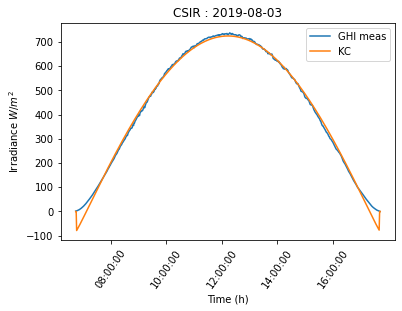

In [169]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'KC')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-03')
plt.legend()

In [170]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
17.198639669089864
Below is the mean absolute error
10.919617861579109
Below is the mean square error
295.79320646719157
Below is the RMSE percent
3.9556226015190497
Below is the MAE percent
2.511471142153373


In [171]:
a = 14
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(6178    06:58:00
 6179    06:59:00
 6180    07:00:00
 6181    07:01:00
 6182    07:02:00
 6183    07:03:00
 6184    07:04:00
 6185    07:05:00
 6186    07:06:00
 6187    07:07:00
 6188    07:08:00
 6189    07:09:00
 6190    07:10:00
 6191    07:11:00
 6192    07:12:00
 6193    07:13:00
 6194    07:14:00
 6195    07:15:00
 6196    07:16:00
 6197    07:17:00
 6198    07:18:00
 6199    07:19:00
 6200    07:20:00
 6201    07:21:00
 6202    07:22:00
 6203    07:23:00
 6204    07:24:00
 6205    07:25:00
 6206    07:26:00
 6207    07:27:00
 6208    07:28:00
 6209    07:29:00
 6210    07:30:00
 6211    07:31:00
 6212    07:32:00
 6213    07:33:00
 6214    07:34:00
 6215    07:35:00
 6216    07:36:00
 6217    07:37:00
 6218    07:38:00
 6219    07:39:00
 6220    07:40:00
 6221    07:41:00
 6222    07:42:00
 6223    07:43:00
 6224    07:44:00
 6225    07:45:00
 6226    07:46:00
 6227    07:47:00
 6228    07:48:00
 6229    07:49:00
 6230    07:50:00
 6231    07:51:00
 6232    07:52:00
 6233    0

In [253]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
27.316969308919617 39.36733930582006 24.13540278869833 5.545483637653323 1.8197872261828494 2.6410449389092094 8.289879759298918 17.664565584757913 35.69161103683123 42.545297285635186
rmse hourly beginning from 7
30.24256021612221 39.458008413756886 25.760328672998316 6.20865612522229 2.5410344544935657 3.199372719734738 9.7841530663213 18.312352677018776 36.332374518597206 42.60634167403289
Below is the RMSE percent
6.955675391798266 9.075193904602875 5.924778952407909 1.4279676164230388 0.5844283915953037 0.7358437227806586 2.2503184990508345 4.211772415139889 8.356309834836098 9.799298743187528
Below is the MAE percent
6.282800458780868 9.054340349931394 5.551052095086612 1.275440432238347 0.4185442349130551 0.6074304278118299 1.9066412443475185 4.062783814156253 8.208936637916528 9.785258762870024


Text(1, 600, 'Elev. : 1381m')

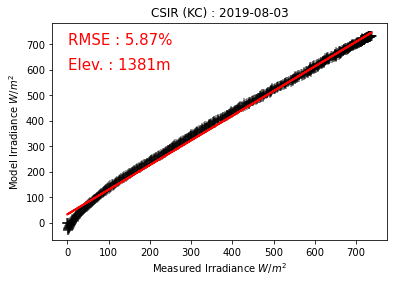

In [151]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (KC) : 2019-08-03')
plt.text(1, 700, 'RMSE : 5.87%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 5. Ineichen - Perez Model

In [254]:
tl = 4.4

linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

relative_airmass = pvlib.atmosphere.get_relative_airmass(apparent_zenith, model='kastenyoung1989')

cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl, dni_extra=dni_extra, altitude=altitude)


df_out = cs['ghi']


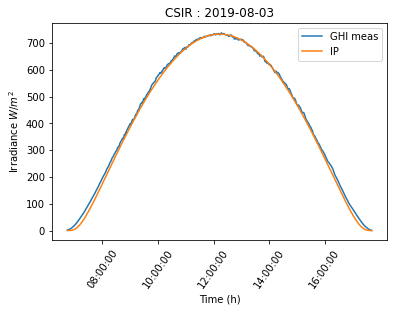

In [255]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'IP')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-03')
plt.legend()

In [256]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
12.31828291176737
Below is the mean absolute error
9.808389318706228
Below is the mean square error
151.74009389433996
Below is the RMSE percent
2.8331588564685273
Below is the MAE percent
2.2558927461747067


In [257]:
a = 14
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(6178    06:58:00
 6179    06:59:00
 6180    07:00:00
 6181    07:01:00
 6182    07:02:00
 6183    07:03:00
 6184    07:04:00
 6185    07:05:00
 6186    07:06:00
 6187    07:07:00
 6188    07:08:00
 6189    07:09:00
 6190    07:10:00
 6191    07:11:00
 6192    07:12:00
 6193    07:13:00
 6194    07:14:00
 6195    07:15:00
 6196    07:16:00
 6197    07:17:00
 6198    07:18:00
 6199    07:19:00
 6200    07:20:00
 6201    07:21:00
 6202    07:22:00
 6203    07:23:00
 6204    07:24:00
 6205    07:25:00
 6206    07:26:00
 6207    07:27:00
 6208    07:28:00
 6209    07:29:00
 6210    07:30:00
 6211    07:31:00
 6212    07:32:00
 6213    07:33:00
 6214    07:34:00
 6215    07:35:00
 6216    07:36:00
 6217    07:37:00
 6218    07:38:00
 6219    07:39:00
 6220    07:40:00
 6221    07:41:00
 6222    07:42:00
 6223    07:43:00
 6224    07:44:00
 6225    07:45:00
 6226    07:46:00
 6227    07:47:00
 6228    07:48:00
 6229    07:49:00
 6230    07:50:00
 6231    07:51:00
 6232    07:52:00
 6233    0

In [258]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
22.508284556502637 15.717308305846373 9.739881236075586 8.541363445773838 2.09446205516702 2.123723133214617 2.8077958407606105 5.426012826502458 8.41304788805978 17.659199641362818
rmse hourly beginning from 7
22.68780625209535 16.18559071437231 10.433074260514182 9.559864665276356 2.617241796924828 2.772782392184769 3.505011099159188 6.425178477383619 8.893839453103018 17.8761528917679
Below is the RMSE percent
5.218110322467308 3.722625142485822 2.3995679392241414 2.1987330082502763 0.6019557944552274 0.6377295478393232 0.806139403416137 1.477766945115454 2.045549708108853 4.111448100978163
Below is the MAE percent
5.176821005974109 3.6149219453319157 2.2401361441844028 1.9644815487712095 0.481718415110044 0.4884483532852075 0.6457825096554047 1.2479625938800307 1.9349694518852867 4.061549667306241


Text(1, 600, 'Elev. : 1381m')

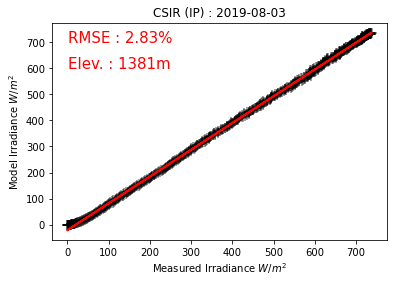

In [259]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (IP) : 2019-08-03')
plt.text(1, 700, 'RMSE : 2.83%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 6. Solis Simplified Model

In [260]:
# A_T = exl_1.iloc[1817: 2516,5]
# R_H = exl_1.iloc[1817: 2516,6]
# A_T.head()

In [261]:
# R_H.head()

In [262]:
# # Precipitable water (cm)
# p_w = np.mean(pvlib.atmosphere.gueymard94_pw(A_T, R_H))

In [263]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
apparent_elevation = solpos['apparent_elevation']
# y_dni = exl_1.iloc[413: 1046,4]


dg = pvlib.clearsky.simplified_solis(apparent_elevation, aod700= 0.0760, precipitable_water= 2.5, pressure=86800, dni_extra=1364)
df_out = dg['ghi']

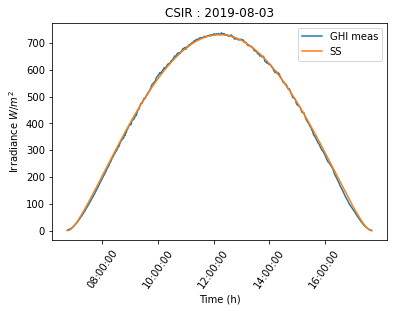

In [264]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'SS')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-03')
plt.legend()

In [265]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
6.867668346242121
Below is the mean absolute error
5.590891279762828
Below is the mean square error
47.164868513975996
Below is the RMSE percent
1.5795379549090742
Below is the MAE percent
1.2858840195723416


In [266]:
a = 14
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(6178    06:58:00
 6179    06:59:00
 6180    07:00:00
 6181    07:01:00
 6182    07:02:00
 6183    07:03:00
 6184    07:04:00
 6185    07:05:00
 6186    07:06:00
 6187    07:07:00
 6188    07:08:00
 6189    07:09:00
 6190    07:10:00
 6191    07:11:00
 6192    07:12:00
 6193    07:13:00
 6194    07:14:00
 6195    07:15:00
 6196    07:16:00
 6197    07:17:00
 6198    07:18:00
 6199    07:19:00
 6200    07:20:00
 6201    07:21:00
 6202    07:22:00
 6203    07:23:00
 6204    07:24:00
 6205    07:25:00
 6206    07:26:00
 6207    07:27:00
 6208    07:28:00
 6209    07:29:00
 6210    07:30:00
 6211    07:31:00
 6212    07:32:00
 6213    07:33:00
 6214    07:34:00
 6215    07:35:00
 6216    07:36:00
 6217    07:37:00
 6218    07:38:00
 6219    07:39:00
 6220    07:40:00
 6221    07:41:00
 6222    07:42:00
 6223    07:43:00
 6224    07:44:00
 6225    07:45:00
 6226    07:46:00
 6227    07:47:00
 6228    07:48:00
 6229    07:49:00
 6230    07:50:00
 6231    07:51:00
 6232    07:52:00
 6233    0

In [267]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
7.294415223944592 7.495482946014193 4.791775789362869 6.201707500325288 3.0872118735187337 2.530497983506464 3.1920926754483157 2.914853236676098 7.352587174027151 11.91998269386497
rmse hourly beginning from 7
8.017527193375608 7.800407188679471 5.883787377993067 6.92829972012732 3.484057838069111 3.03301275078828 3.91706985373358 3.600450936429989 8.425166271658476 12.403383499130504
Below is the RMSE percent
1.8440011759423316 1.794064389409062 1.3532490233370602 1.5934829434381663 0.8013202319736188 0.6975815540385978 0.9009113710897008 0.8280902079365771 1.937756634649691 2.852731672298907
Below is the MAE percent
1.6776881357981717 1.7239329575490399 1.1020904547399357 1.4263694587651712 0.710047148933315 0.5820050427968673 0.7341693399065765 0.6704053090797203 1.6910674660794247 2.741551300613031


Text(1, 600, 'Elev. : 1381m')

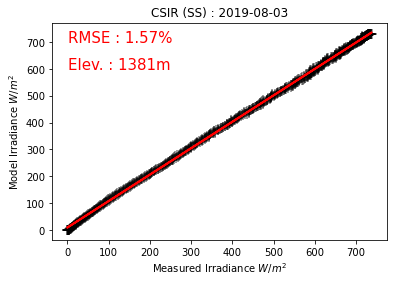

In [162]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'SS', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (SS) : 2019-08-03')
plt.text(1, 700, 'RMSE : 1.57%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 7. Bird - Hulstrom Model

In [268]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
zenith = solpos['zenith']

airmass_relative = airmass

bd = pvlib.clearsky.bird(zenith, airmass_relative, aod380 = 0.44, aod500 = 0.1, precipitable_water = 2.5
                         , ozone=0.3, pressure= 86800 , dni_extra=1364.0, asymmetry=0.85, albedo=0.25)
df_out = bd['ghi'].fillna(0)

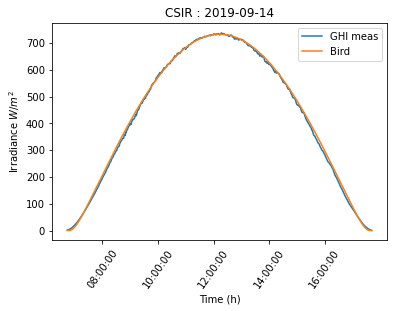

In [269]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'Bird')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-14')
plt.legend()

In [270]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
8.327738154636112
Below is the mean absolute error
6.649929764274646
Below is the mean square error
69.35122277218208
Below is the RMSE percent
1.9153485332456162
Below is the MAE percent
1.52945889792405


In [271]:
a = 14
b = a+60
f1 = (b-1)
f2 = (b+60)
g1 = (f2 - 1)
g2 = (f2 + 60)
h1 = (g2 - 1)
h2 = (g2 +60)
i1 = (h2 - 1)
i2 = (h2 + 60)
j1 = (i2 - 1)
j2 = (i2 + 60)
l1 = (j2 - 1)
l2 = (j2 + 60)
z1 = (l2 - 1)
z2 = (l2 + 60)
v1 = (z2 - 1)
v2 = (z2 + 60)
n1 = (v2 - 1)
n2 = (v2 + 60)



x[a:b], x[f1: f2], x[g1:g2], x[h1:h2], x[i1:i2], x[j1:j2], x[l1:l2], x[z1:z2], x[v1:v2], x[n1:n2] 


(6178    06:58:00
 6179    06:59:00
 6180    07:00:00
 6181    07:01:00
 6182    07:02:00
 6183    07:03:00
 6184    07:04:00
 6185    07:05:00
 6186    07:06:00
 6187    07:07:00
 6188    07:08:00
 6189    07:09:00
 6190    07:10:00
 6191    07:11:00
 6192    07:12:00
 6193    07:13:00
 6194    07:14:00
 6195    07:15:00
 6196    07:16:00
 6197    07:17:00
 6198    07:18:00
 6199    07:19:00
 6200    07:20:00
 6201    07:21:00
 6202    07:22:00
 6203    07:23:00
 6204    07:24:00
 6205    07:25:00
 6206    07:26:00
 6207    07:27:00
 6208    07:28:00
 6209    07:29:00
 6210    07:30:00
 6211    07:31:00
 6212    07:32:00
 6213    07:33:00
 6214    07:34:00
 6215    07:35:00
 6216    07:36:00
 6217    07:37:00
 6218    07:38:00
 6219    07:39:00
 6220    07:40:00
 6221    07:41:00
 6222    07:42:00
 6223    07:43:00
 6224    07:44:00
 6225    07:45:00
 6226    07:46:00
 6227    07:47:00
 6228    07:48:00
 6229    07:49:00
 6230    07:50:00
 6231    07:51:00
 6232    07:52:00
 6233    0

In [272]:
s1 = np.array(y[a:b])
s2 = np.array(y[f1: f2])
s3 = np.array(y[g1:g2]) 
s4 = np.array(y[h1:h2])
s5 = np.array(y[i1:i2]) 
s6 = np.array(y[j1:j2])
s7 = np.array(y[l1:l2]) 
s8 = np.array(y[z1:z2])
s9 = np.array(y[v1:v2]) 
s10 = np.array(y[n1:n2]) 




m1 = np.array(df_out[a:b])
m2 = np.array(df_out[f1: f2])
m3 = np.array(df_out[g1:g2]) 
m4 = np.array(df_out[h1:h2])
m5 = np.array(df_out[i1:i2]) 
m6 = np.array(df_out[j1:j2])
m7 = np.array(df_out[l1:l2]) 
m8 = np.array(df_out[z1:z2])
m9 = np.array(df_out[v1:v2]) 
m10 = np.array(df_out[n1:n2]) 






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae1 = mean_absolute_error(s1, m1)
mae2 = mean_absolute_error(s2, m2)
mae3 = mean_absolute_error(s3, m3)
mae4 = mean_absolute_error(s4, m4)
mae5 = mean_absolute_error(s5, m5)
mae6 = mean_absolute_error(s6, m6)
mae7 = mean_absolute_error(s7, m7)
mae8 = mean_absolute_error(s8, m8)
mae9 = mean_absolute_error(s9, m9)
mae10 = mean_absolute_error(s10, m10)






rms1 = sqrt(mean_squared_error(s1, m1))
rms2 = sqrt(mean_squared_error(s2, m2))
rms3 = sqrt(mean_squared_error(s3, m3))
rms4 = sqrt(mean_squared_error(s4, m4))
rms5 = sqrt(mean_squared_error(s5, m5))
rms6 = sqrt(mean_squared_error(s6, m6))
rms7 = sqrt(mean_squared_error(s7, m7))
rms8 = sqrt(mean_squared_error(s8, m8))
rms9 = sqrt(mean_squared_error(s9, m9))
rms10 = sqrt(mean_squared_error(s10, m10))





mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))


print ('mae hourly beginning from 7')
print (mae1, mae2 
,mae3 
,mae4 
,mae5 
,mae6 
,mae7 
,mae8 
,mae9 
,mae10)

print ('rmse hourly beginning from 7')
print (rms1,
rms2, 
rms3, 
rms4, 
rms5,
rms6,
rms7,
rms8,
rms9,
rms10)



rmse_percent1 = (rms1/np.mean(y))*100
rmse_percent2 = (rms2/np.mean(y))*100
rmse_percent3 = (rms3/np.mean(y))*100
rmse_percent4= (rms4/np.mean(y))*100
rmse_percent5= (rms5/np.mean(y))*100
rmse_percent6 = (rms6/np.mean(y))*100
rmse_percent7 = (rms7/np.mean(y))*100
rmse_percent8 = (rms8/np.mean(y))*100
rmse_percent9 = (rms9/np.mean(y))*100
rmse_percent10 = (rms10/np.mean(y))*100



print ('Below is the RMSE percent')
print (rmse_percent1, 
rmse_percent2,
rmse_percent3,
rmse_percent4,
rmse_percent5,
rmse_percent6,
rmse_percent7,
rmse_percent8,
rmse_percent9,
rmse_percent10)



mae_percent1 = (mae1/np.mean(y))*100
mae_percent2 = (mae2/np.mean(y))*100
mae_percent3 = (mae3/np.mean(y))*100
mae_percent4 = (mae4/np.mean(y))*100
mae_percent5 = (mae5/np.mean(y))*100
mae_percent6 = (mae6/np.mean(y))*100
mae_percent7 = (mae7/np.mean(y))*100
mae_percent8 = (mae8/np.mean(y))*100
mae_percent9 = (mae9/np.mean(y))*100
mae_percent10 = (mae10/np.mean(y))*100



print ('Below is the MAE percent')
print (mae_percent1,
mae_percent2,
mae_percent3,
mae_percent4,
mae_percent5,
mae_percent6,
mae_percent7,
mae_percent8,
mae_percent9,
mae_percent10)

    

mae hourly beginning from 7
6.480005067646812 11.825939404161474 7.156060801791194 2.960501877104011 1.5649789641935696 2.2630148421787872 5.086221509323616 5.570361072261381 12.677878716739192 13.44809746673039
rmse hourly beginning from 7
7.336884460584951 11.972896862384932 8.511931535692312 3.6018152035475683 2.0646965733255853 2.937461369760971 6.118332275976399 6.3970669701572405 13.392852271318844 13.631823659273863
Below is the RMSE percent
1.6874559008979773 2.7537213608599664 1.9577123198691357 0.8284039842554394 0.4748724659546179 0.675605094872628 1.4071934699552004 1.471301403916444 3.0803057778137664 3.135268300518986
Below is the MAE percent
1.4903768551886958 2.7199216967937874 1.645867137752979 0.6809043251228202 0.3599392905935303 0.5204849237805554 1.1698118656891143 1.2811621488680818 2.915864542553365 3.093011965500691


Text(1, 600, 'Elev. : 1381m')

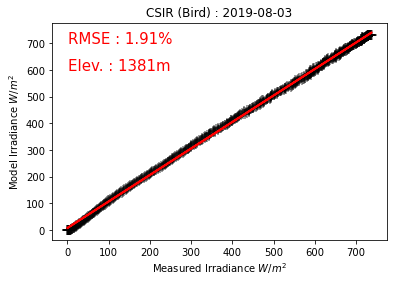

In [166]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'Bird', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (Bird) : 2019-08-03')
plt.text(1, 700, 'RMSE : 1.91%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# Day 6

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pvlib
from pvlib import atmosphere, tools

naive_times = pd.date_range(start = '2019-08-05 06:42', end = '2019-08-05 17:43', freq = '1min')
coordinates = [(-25.750233, 28.278718, 'South Africa-Pretoria', 1381, 'Etc/GMT-2')]


sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
# inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = {'module': module,'surface_azimuth': 180}

for latitude, longitude, name, altitude, timezone in coordinates:

	times = naive_times.tz_localize(timezone)
	system['surface_tilt'] = latitude

	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

exl_1 = pd.read_csv('csir_1.csv')
x = exl_1.iloc[7602:8264,1]
y = exl_1.iloc[7602:8264,2]
c = exl_1.iloc[7602:8264,1]
c1 = exl_1.iloc[7602:8264,0]

apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1040.0 * cos_zenith[cos_zen_gte_0] * np.exp(-0.059/cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])


import ephem
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
sunset.head()

,sunrise,sunset,transit
2019-08-05 06:42:00+02:00,2019-08-05 06:42:49.226706+02:00,2019-08-05 17:43:18.814196+02:00,2019-08-05 12:12:56.206676+02:00
2019-08-05 06:43:00+02:00,2019-08-06 06:42:08.829262+02:00,2019-08-05 17:43:18.814196+02:00,2019-08-05 12:12:56.206676+02:00
2019-08-05 06:44:00+02:00,2019-08-06 06:42:08.829262+02:00,2019-08-05 17:43:18.814196+02:00,2019-08-05 12:12:56.206676+02:00
2019-08-05 06:45:00+02:00,2019-08-06 06:42:08.829262+02:00,2019-08-05 17:43:18.814196+02:00,2019-08-05 12:12:56.206676+02:00
2019-08-05 06:46:00+02:00,2019-08-06 06:42:08.829262+02:00,2019-08-05 17:43:18.814196+02:00,2019-08-05 12:12:56.206676+02:00


In [168]:
x

7602    06:42:00
7603    06:43:00
7604    06:44:00
7605    06:45:00
7606    06:46:00
          ...   
8259    17:39:00
8260    17:40:00
8261    17:41:00
8262    17:42:00
8263    17:43:00
Name: TMESTAMP, Length: 662, dtype: object

# 1. Haurwitz model

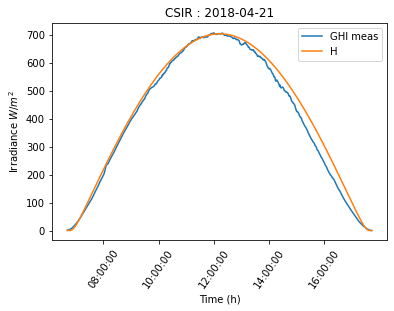

In [169]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'H')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2018-04-21')
plt.legend()

In [170]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
28.36901430781155
Below is the mean absolute error
21.14140538150047
Below is the mean square error
804.8009727968165
Below is the RMSE percent
6.927766218274324
Below is the MAE percent
5.162770634877952


Text(1, 600, 'Elev. : 1381m')

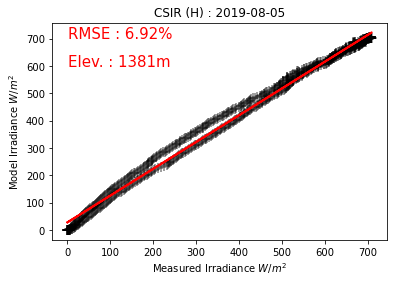

In [171]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (H) : 2019-08-05')
plt.text(1, 700, 'RMSE : 6.92%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

In [172]:
#sns.regplot(x=y, y=df_out, color='black', marker='+')

# 2. ABCG MODEL

In [173]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1000 * (cos_zenith[cos_zen_gte_0] **1.15))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (939.39 * (cos_zenith[cos_zen_gte_0] **1.15))
# ABCG_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

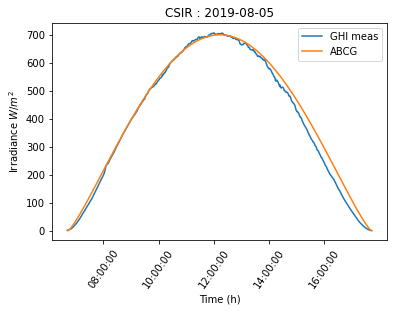

In [174]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'ABCG')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-05')
plt.legend()

In [175]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
24.556159881416463
Below is the mean absolute error
17.554351412845556
Below is the mean square error
603.0049881216873
Below is the RMSE percent
5.996660054211929
Below is the MAE percent
4.286805363841668


Text(1, 600, 'Elev. : 1381m')

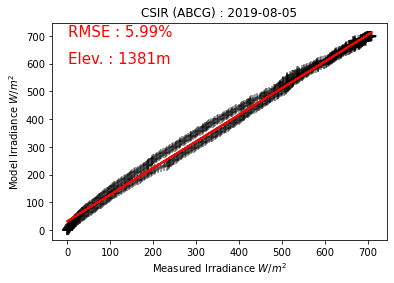

In [176]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'H', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (ABCG) : 2019-08-05')
plt.text(1, 700, 'RMSE : 5.99%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 3. Berger Duffie Model

In [177]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = (1060.0 * (0.90*cos_zenith[cos_zen_gte_0]))

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

# # The standard model for the GHI modelling... 
# clearsky_ghi2 = np.zeros_like(apparent_zenith.values)
# clearsky_ghi2[cos_zen_gte_0] = (1390* (0.70*cos_zenith[cos_zen_gte_0]))
# BD_std = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi2, columns=['ghi'])

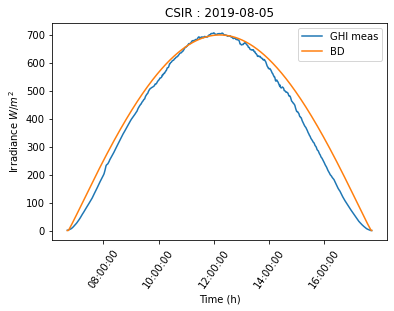

In [178]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'BD')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-05')
plt.legend()

In [179]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
44.83504412132806
Below is the mean absolute error
35.805479486599474
Below is the mean square error
2010.1811813614338
Below is the RMSE percent
10.948801417222603
Below is the MAE percent
8.743764888160946


Text(1, 600, 'Elev. : 1381m')

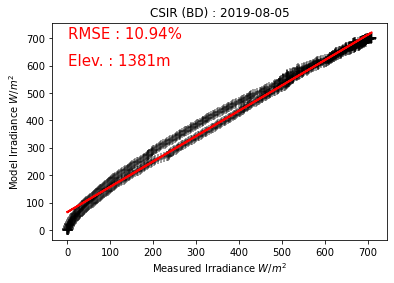

In [180]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'BD', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (BD) : 2019-08-05')
plt.text(1, 700, 'RMSE : 10.94%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 4. Kasten Czeplak Model

In [179]:
apparent_zenith = solpos['apparent_zenith']
cos_zenith = tools.cosd(apparent_zenith.values)
clearsky_ghi = np.zeros_like(apparent_zenith.values)
cos_zen_gte_0 = cos_zenith > 0
clearsky_ghi[cos_zen_gte_0] = ((1045.0 * cos_zenith[cos_zen_gte_0]) - 60)

df_out = pd.DataFrame(index=apparent_zenith.index, data=clearsky_ghi, columns=['ghi'])

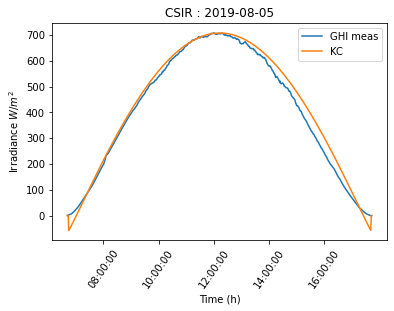

In [180]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'KC')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-05')
plt.legend()

In [181]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
29.262286343182012
Below is the mean absolute error
22.722356584267835
Below is the mean square error
856.2814020303764
Below is the RMSE percent
7.145904915770932
Below is the MAE percent
5.548841867964684


Text(1, 600, 'Elev. : 1381m')

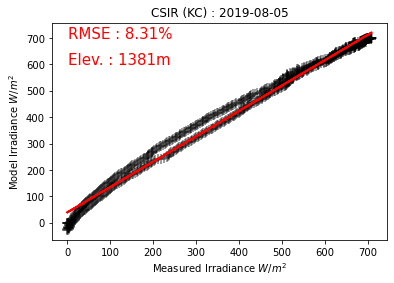

In [184]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (KC) : 2019-08-05')
plt.text(1, 700, 'RMSE : 8.31%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 5. Ineichen - Perez Model

In [185]:
tl = 6.0

linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

relative_airmass = pvlib.atmosphere.get_relative_airmass(apparent_zenith, model='kastenyoung1989')

cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl, dni_extra=dni_extra, altitude=altitude)


df_out = cs['ghi']


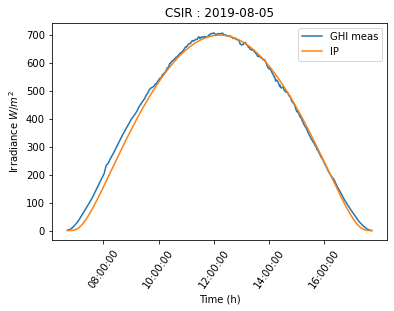

In [186]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'IP')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-05')
plt.legend()

In [187]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
20.768270971194685
Below is the mean absolute error
15.25456989399022
Below is the mean square error
431.32107913296784
Below is the RMSE percent
5.071650515773908
Below is the MAE percent
3.7251944265398897


Text(1, 600, 'Elev. : 1381m')

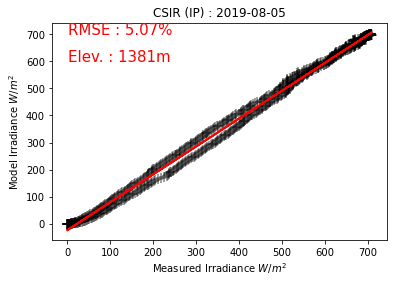

In [188]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'KC', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (IP) : 2019-08-05')
plt.text(1, 700, 'RMSE : 5.07%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 6. Solis Simplified Model

In [189]:
# A_T = exl_1.iloc[1817: 2516,5]
# R_H = exl_1.iloc[1817: 2516,6]
# A_T.head()

In [190]:
# R_H.head()

In [191]:
# # Precipitable water (cm)
# p_w = np.mean(pvlib.atmosphere.gueymard94_pw(A_T, R_H))

In [192]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
apparent_elevation = solpos['apparent_elevation']
# y_dni = exl_1.iloc[413: 1046,4]


dg = pvlib.clearsky.simplified_solis(apparent_elevation, aod700= 0.00760, precipitable_water= 9.5, pressure=86800, dni_extra=1364)
df_out = dg['ghi']

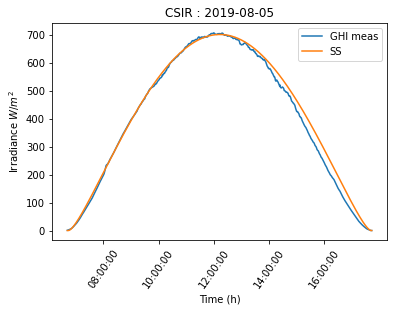

In [193]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'SS')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-08-05')
plt.legend()

In [194]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
21.6255047516886
Below is the mean absolute error
15.015161694208157
Below is the mean square error
467.66245576530616
Below is the RMSE percent
5.280988604197871
Below is the MAE percent
3.6667304975209905


Text(1, 600, 'Elev. : 1381m')

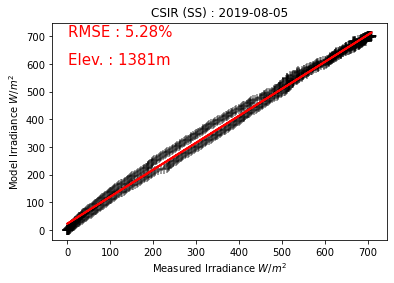

In [195]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'SS', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (SS) : 2019-08-05')
plt.text(1, 700, 'RMSE : 5.28%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')

# 7. Bird - Hulstrom Model

In [196]:
	solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
	dni_extra = pvlib.irradiance.get_extra_radiation(times)
	airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
	pressure = pvlib.atmosphere.alt2pres(altitude)
	am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
sunset = pvlib.solarposition.sun_rise_set_transit_ephem(times, latitude, longitude)
zenith = solpos['zenith']

airmass_relative = airmass

bd = pvlib.clearsky.bird(zenith, airmass_relative, aod380 = 0.44, aod500 = 0.1, precipitable_water = 9.5
                         , ozone=0.3, pressure= 86800 , dni_extra=1364.0, asymmetry=0.85, albedo=0.25)
df_out = bd['ghi'].fillna(0)

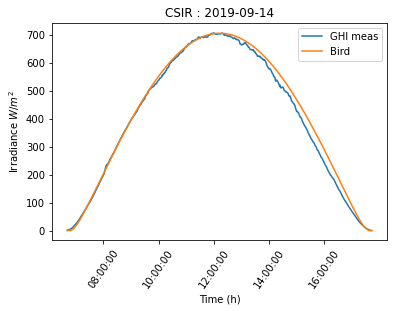

In [197]:
plt.plot(x,y, label = 'GHI meas')

plt.plot(x, df_out, label = 'Bird')

plt.xlabel ('Time (h)')
plt.ylabel ('Irradiance $W/m^2$')
plt.xticks(['08:00:00', '10:00:00','12:00:00', '14:00:00', '16:00:00'], rotation=55)
plt.title ('CSIR : 2019-09-14')
plt.legend()

In [198]:
y1 = np.array(y)
y2 = np.array(df_out)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y1, y2)
mse = mean_squared_error(y1, y2)
rms = sqrt(mean_squared_error(y1, y2))
# rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Below is the rms value of')
print(rms)

print ('Below is the mean absolute error')
print (mae)

print ('Below is the mean square error')
print (mse)

rmse_percent = (rms/np.mean(y))*100

print ('Below is the RMSE percent')
print (rmse_percent)

mae_percent = (mae/np.mean(y))*100

print ('Below is the MAE percent')
print (mae_percent)

Below is the rms value of
21.734815069707537
Below is the mean absolute error
15.243516362231558
Below is the mean square error
472.40218611438587
Below is the RMSE percent
5.3076823877838555
Below is the MAE percent
3.7224951334633167


Text(1, 600, 'Elev. : 1381m')

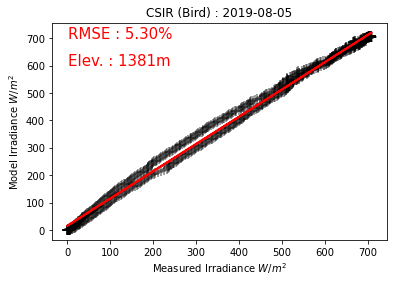

In [199]:
meas_fit = np.polyfit(y, df_out, 1)
plt.scatter(y, df_out, label = 'Bird', marker = "+", alpha = 0.5, s=100, cmap='viridis', color= 'black')
# regression lines
plt.plot(y, meas_fit[0] * y + meas_fit[1], color='red', linewidth=2)
plt.xlabel ('Measured Irradiance $W/m^2$')
plt.ylabel ('Model Irradiance $W/m^2$')
plt.title ('CSIR (Bird) : 2019-08-05')
plt.text(1, 700, 'RMSE : 5.30%', fontsize=15,  color='red')
plt.text(1, 600, 'Elev. : 1381m', fontsize=15,  color='red')